# Projet Machine Learning: Prédiction de l'émission de CO2

L'objectif de ce projet est de se servir des informations collectées 

Nous allons commencer par importer les librairies dont nous aurons besoin et à charger les données. 

In [124]:
import pandas as pd
import numpy as np
import random as rd



import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


%matplotlib inline





In [125]:
# Spécifiez le chemin du fichier Excel
energy ="global-data-on-sustainable-energy (1).csv"
energy=pd.read_csv(energy, sep=",")
energy

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


Le jeu de données est composé de 3649 observations et 21 variables. Les observations, représentant les individus, sont les données liées à la consommation d'énergie colléctées dans 176 pays et sur 21 années. Théoriquement, on devrait avoir 3696 observations. Il y a donc des données manquantes. Nous allons faire une analyse exploratoire afin de les identifier.

## Analyse exploratoire des données : 

La première étape de l'analyse descriptive est de vérifier l'encodage de nos données. 

In [126]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Nous voyons que sur les 21 variables, 2 sont considérées comme qualitatives : Entity et Density. 
Les autres sont considérées comme quantitatives. Cependant l'encodage de Density et Year ne sont pas optimales au vu des observations. En effet, Year devrait être considérée comme qualitative puisque nous n'avons que 21 modalités. De même, Density représentant un scalaire, il serait pertinent de l'encoder comme une variable quantitative.

In [127]:
energy["Entity"]=pd.Categorical(energy["Entity"],ordered=False)
energy["Year"]=pd.Categorical(energy["Year"],ordered=True)
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64 
 5   Financial flows to developing countries (US $)                    1560 non-null   float64 
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 7   Electricity from fossil 

In [128]:
import re 
def clean_density(density):
    if pd.isnull(density):
        return np.nan
    if isinstance(density, (int,float)): 
        return density
    
    cleaned_density=re.sub(r'[^0-9.]', '', str(density))
    return float(cleaned_density)
energy['Density\\n(P/Km2)']=energy['Density\\n(P/Km2)'].apply(clean_density)



In [129]:
energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64 
 5   Financial flows to developing countries (US $)                    1560 non-null   float64 
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 7   Electricity from fossil 

In [130]:
energy.head(270)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Bahrain,2013,100.000000,100.0,0.90,NaN,0.00,24.36,0.0,0.00,...,161365.53000,9.54,28850.000380,NaN,5.416840,24744.296960,2239.0,765.0,26.06670,50.557700
266,Bahrain,2014,100.000000,100.0,4.26,NaN,0.00,25.62,0.0,0.01,...,153929.60000,8.77,30280.000690,NaN,4.350391,24989.437530,2239.0,765.0,26.06670,50.557700
267,Bahrain,2015,100.000000,100.0,4.15,NaN,0.00,26.77,0.0,0.01,...,149472.80000,9.05,30579.999920,NaN,2.485379,22634.085650,2239.0,765.0,26.06670,50.557700
268,Bahrain,2016,100.000000,100.0,4.69,NaN,0.00,26.80,0.0,0.01,...,144113.94000,8.62,30299.999240,NaN,3.558128,22608.452560,2239.0,765.0,26.06670,50.557700


On a bien le bon format pour toutes nos variables. Passons maintenant à l'identification des valeurs manquantes

In [131]:

energy_missing_value = energy.isnull().sum().sort_values(ascending=False)
print(energy_missing_value)

missing=energy.isnull().sum().values
T= np.sum(missing)
Percent= np.floor(1/energy.shape[0]*missing*100)
#print(M)
print("Taux de valeurs manquantes par variable  en % : ")
print(Percent)
print("Taux global de valeurs manquantes  en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))





Renewables (% equivalent primary energy)                            2137
Financial flows to developing countries (US $)                      2089
Renewable-electricity-generating-capacity-per-capita                 931
Value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Renewable energy share in the total final energy consumption (%)     194
Access to clean fuels for cooking                                    169
Electricity from nuclear (TWh)                                       126
Low-carbon electricity (% electricity)                                42
Electricity from renewables (TWh)                                     21
Electricity from fossil fuels (TWh)                                   21
Access to electricity (% of population)            

On remarque qu'il y a des données manquantes pour 11 variables. On fait le choix de ne garder que les variables qui ont un taux de données manquantes inférieur à 15%. Nous allons donc supprimer de notre étude les variables : Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

In [132]:
#to_drop=['Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)']
energy=energy.drop(energy.columns[4],axis=1)
#energy=energy
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [133]:
energy=energy.drop(energy.columns[4],axis=1)
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [134]:
energy=energy.drop(energy.columns[12],axis=1)
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [135]:
M=energy.isnull().sum().values
T= np.sum(M)
Percent= np.floor(1/energy.shape[0]*M*100)
#print(M)
print("Taux de valeurs manquantes par variable en % : ")
print(Percent)
print("Taux de valeurs manquantes par variable en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))

Taux de valeurs manquantes par variable en % : 
[ 0.  0.  0.  4.  5.  0.  3.  0.  1.  0.  5. 11.  8.  7.  0.  0.  0.  0.]
Taux de valeurs manquantes par variable en % : 
2.7724490728053346


En enlevant ces colonnes, nous avons drastiquement diminué le taux de valeurs manquantes dans nos données. Ce qui rend notre jeu de données plus exploitable et donc nos prévisions plus pertinentes.

In [136]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 5   Electricity from fossil fuels (TWh)                               3628 non-null   float64 
 6   Electricity from nuclear (TWh)                                    3523 non-null   float64 
 7   Electricity from renewab

Question 3: 

Dans le but d'avoir un jeu de données exploitable, nous allons enlever les individus qui ont des valeurs manquantes.


In [137]:
energy= energy.dropna()
energy.info()
energy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 3 to 3647
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            2868 non-null   category
 1   Year                                                              2868 non-null   category
 2   Access to electricity (% of population)                           2868 non-null   float64 
 3   Access to clean fuels for cooking                                 2868 non-null   float64 
 4   Renewable energy share in the total final energy consumption (%)  2868 non-null   float64 
 5   Electricity from fossil fuels (TWh)                               2868 non-null   float64 
 6   Electricity from nuclear (TWh)                                    2868 non-null   float64 
 7   Electricity from renewab

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


In [138]:
M=energy.isnull().sum().values
T= np.sum(M)
Percent= np.floor(1/energy.shape[0]*M*100)
#print(M)
print("Taux de valeurs manquantes par variable en % : ")
print(Percent)
print("Taux de valeurs manquantes par variable en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))

Taux de valeurs manquantes par variable en % : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Taux de valeurs manquantes par variable en % : 
0.0


Notre jeu de données est donc prêt à l'emploi.

## Analyse descriptive unidimensionnelle

## Pour les variables qualitatives 

In [139]:
pd.crosstab(energy.Year, "freq")


col_0,freq
Year,
2000,137
2001,138
2002,140
2003,141
2004,141
2005,141
2006,141
2007,144
2008,144


<Axes: xlabel='Year'>

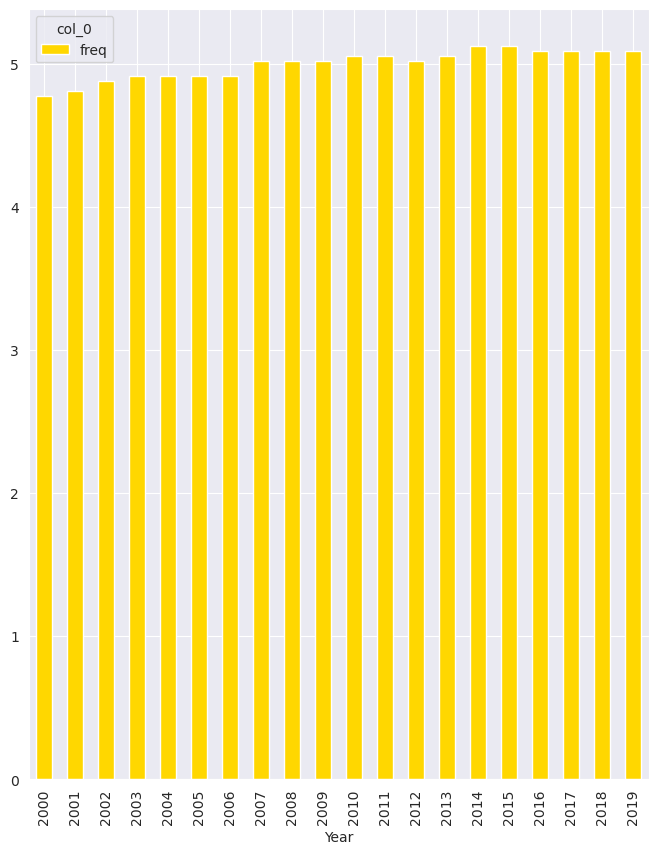

In [140]:
t=pd.crosstab(energy.Year,"freq", normalize=True)
(t * 100).plot(kind = "bar",color='gold')
#t.plot.pie(subplots=True, figsize = (6, 6))

On constate qu'aucune donnée n'a été prise en 2020 comme annoncé dans le sujet. De plus, les occurrences des années ne sont pas les mêmes. Il y a donc eu des années où les données n'ont pas été relevées dans le même nombre de pays.

Théoriquement, le nombre d'occurrences de chaque pays devrait être 20 vu que les données ont été collectées entre 2000 et 2019. Nous allons donc afficher l'histogramme de la variable Entity mais en ne conservant que les modalités dont les occurrences sont inférieures à 20. 

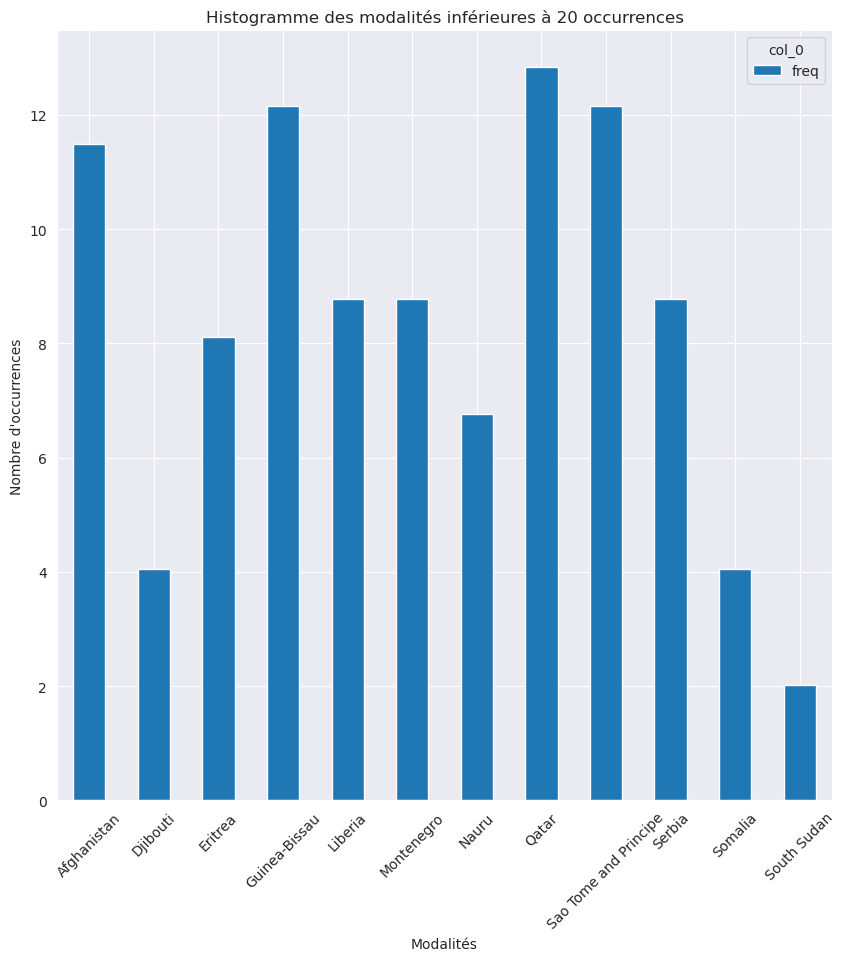

In [141]:



modalites = energy['Entity'].value_counts()
modalites_a_afficher = modalites[modalites < 20].index

# Filtrer le DataFrame pour ne conserver que les modalités sélectionnées
energy_filtre = energy[energy['Entity'].isin(modalites_a_afficher)]
t=pd.crosstab(energy_filtre.Entity,"freq", normalize=True)
(t * 100).plot(kind = "bar", figsize = (10, 10))
plt.title('Histogramme des modalités inférieures à 20 occurrences')
plt.xlabel('Modalités')
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

Les relevés n'ont pas été faits à intervales réguliers dans tous les pays. Le Soudan du Sud, la Somalie et Djibouti ont moins de quatre occurences. L'échantillon de données que nous avons n'est pas représentatif de ces pays. Les analyses et prédictions que nous ferons pourraient donc être éloignées de la réalité. 

## Pour les variables quantitatives

In [142]:
energy.describe().round(2)

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00
mean,76.58,62.17,35.80,76.69,15.34,26.60,39.63,26082.46,5.42,168818.22,3.90,12577.05,228.21,658166.76,18.14,12.97
std,31.51,39.24,30.02,374.42,78.78,107.64,34.45,37097.46,3.58,818020.25,4.65,18730.48,742.36,1705047.83,24.92,65.48
min,1.25,0.00,0.00,0.00,0.00,0.00,0.00,105.11,1.03,30.00,-36.66,111.93,2.00,21.00,-40.90,-175.20
25%,53.24,22.08,9.19,0.29,0.00,0.09,6.09,2779.97,3.28,2187.50,1.77,1209.80,31.00,29743.00,1.65,-10.94
50%,97.00,81.55,28.79,3.00,0.00,1.68,35.01,11922.76,4.40,10425.00,3.79,4168.11,83.00,131957.00,17.06,18.64
75%,100.00,100.00,60.67,25.79,0.00,10.10,66.88,31838.56,6.14,58145.00,5.96,14828.34,206.00,488100.00,39.40,43.68
max,100.00,100.00,96.04,5098.22,809.41,2014.57,100.00,262585.70,32.57,10707219.73,63.38,123514.20,8358.00,9984670.00,64.96,178.07


  Les variables correspondant à des pourcentages sont bien entre 0 et 100.
  L'émission de CO2 par pays varie entre 30 et plus de 10 millions kt. En moyenne, la quantité de CO2 par pays est de 168818.22 alors que la médiane est de 10425. On peut donc conclure que la moyenne d'émission de CO2 par pays est biaisée. Ce biais vient d'un petit nombre de grands pollueurs.  

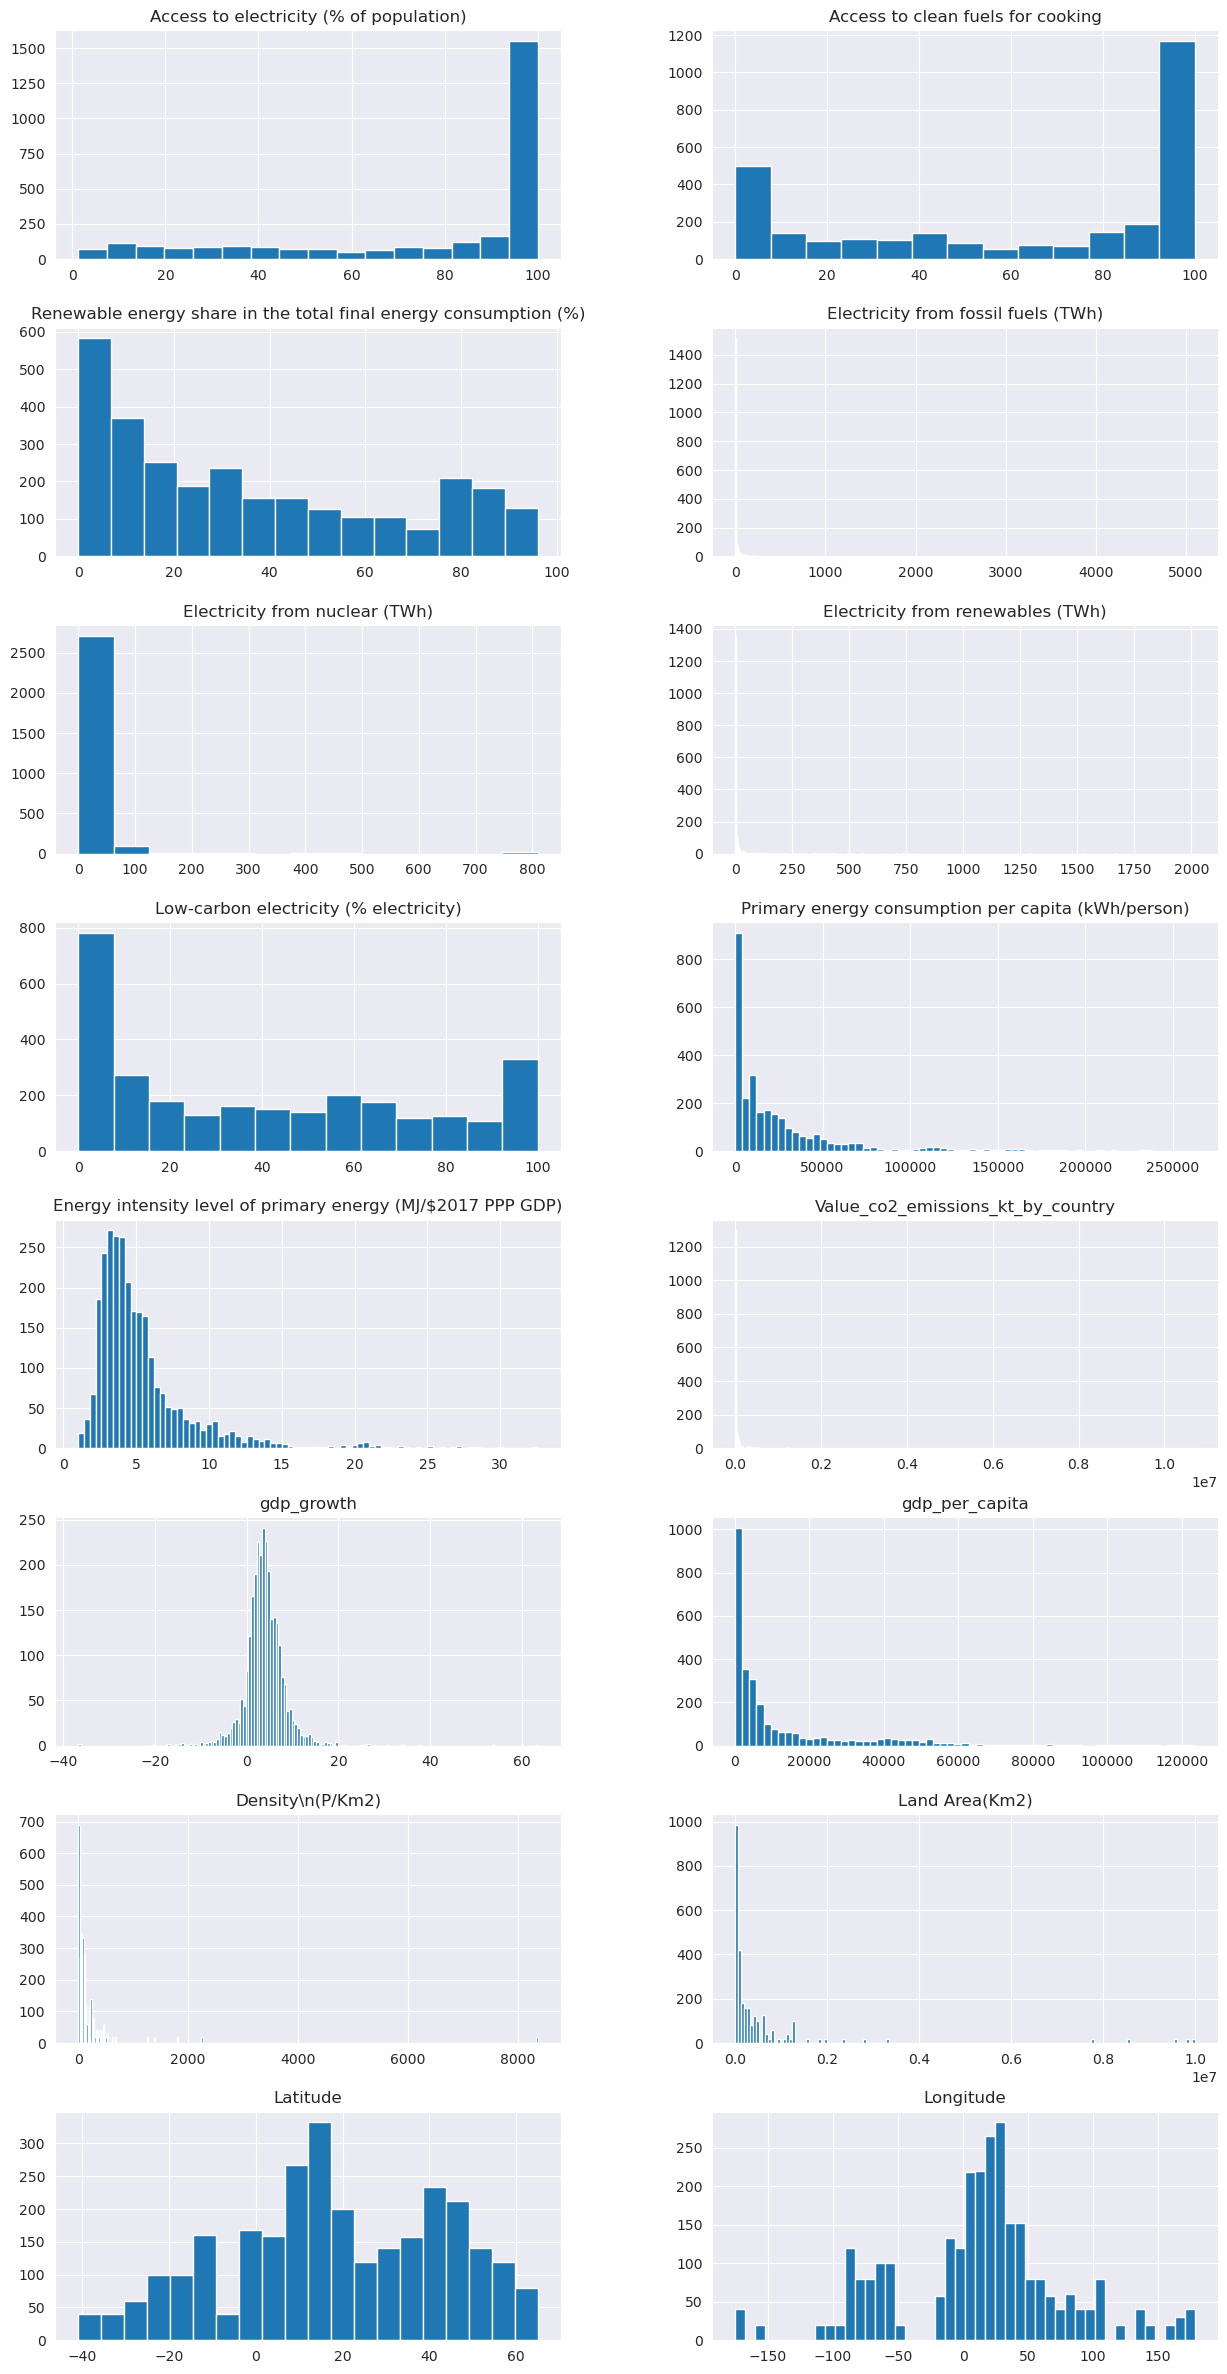

In [143]:

energy.hist(figsize = (15,30),layout=(8,2),bins='auto')
plt.show()

Les histogrammes nous montrent qu'à l'exception de gdp_growth,latitude et longitde, les variables ne sont pas symétriques et centrées autour d'une valeur. Ceci suggère des transformations pour une meilleure utilisation des modèles linéaires. Nous avons essayé plusieurs transformations de variables possibles et gardé celles qui nous semblaient les plus pertinentes. 

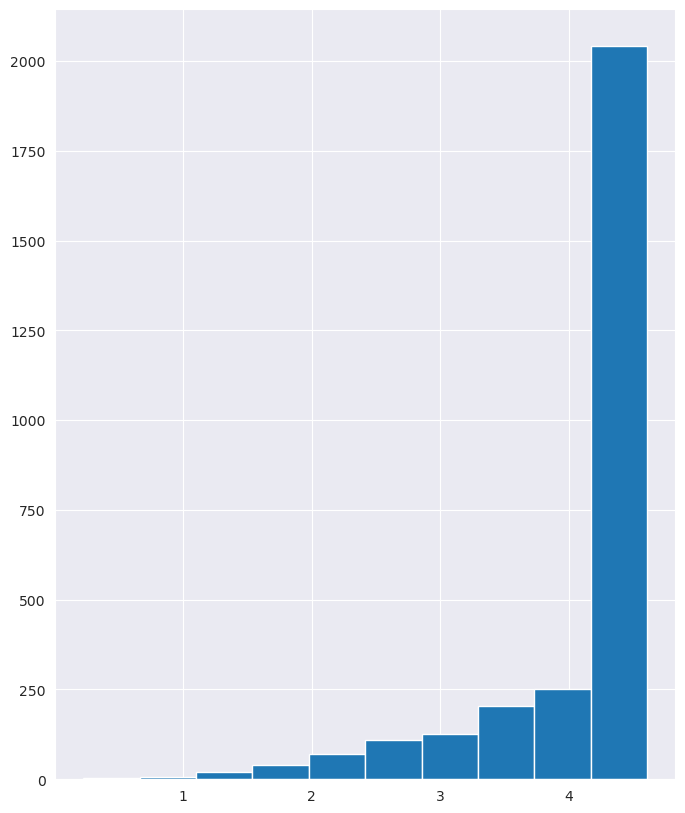

In [144]:
from math import sqrt, log
energy["SAccess to electricity (% of population)"]=energy["Access to electricity (% of population)"].map(lambda x: log(x))
energy["SAccess to electricity (% of population)"].hist()
plt.show()


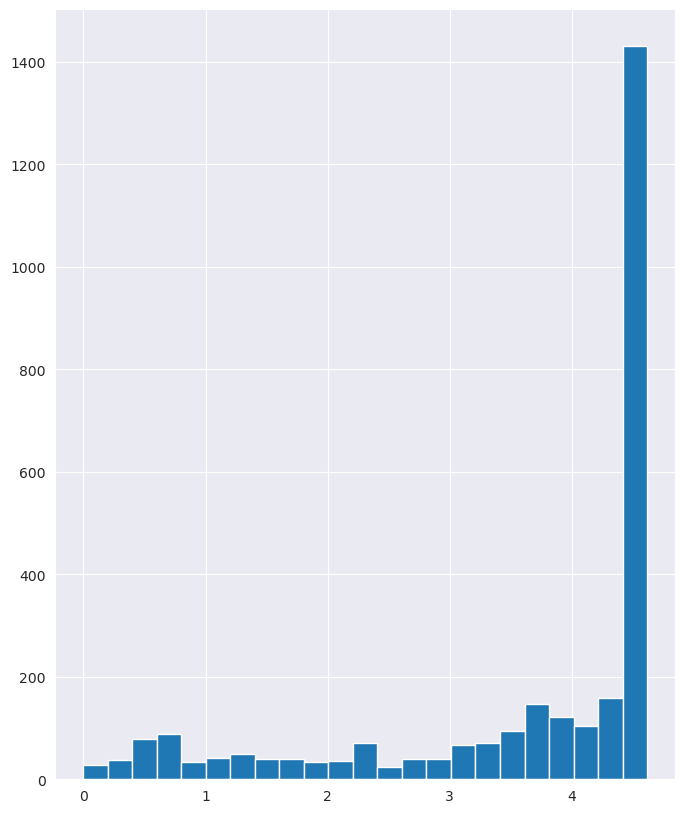

In [145]:
energy["SAccess to clean fuels for cooking"]=energy["Access to clean fuels for cooking"].map(lambda x: log(1+x))
energy["SAccess to clean fuels for cooking"].hist(bins='auto')
plt.show()


<Axes: >

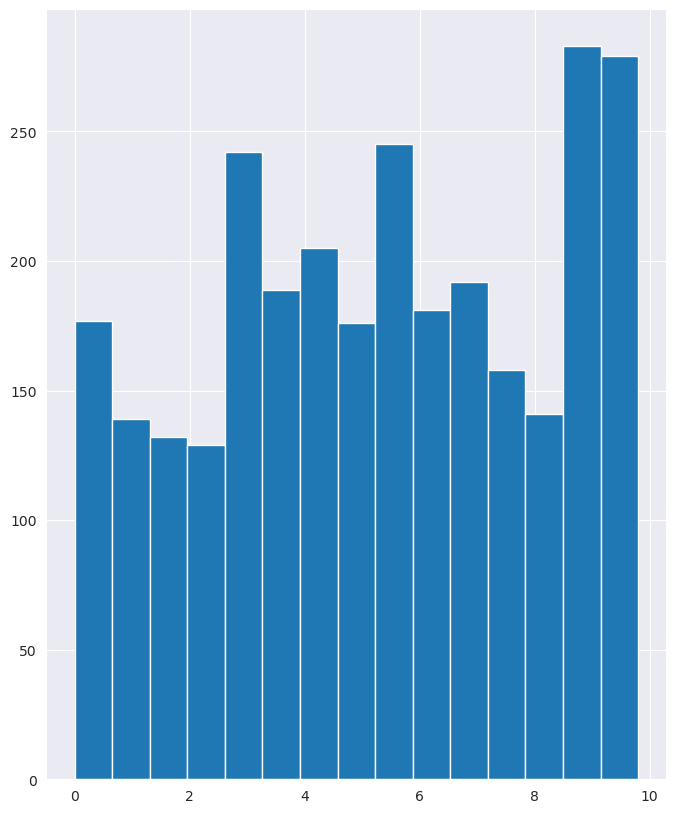

In [146]:

energy["SRenewable energy share in the total final energy consumption (%)"]=energy["Renewable energy share in the total final energy consumption (%)"].map(lambda x: sqrt(x))
energy["SRenewable energy share in the total final energy consumption (%)"].hist(bins='auto')

<Axes: >

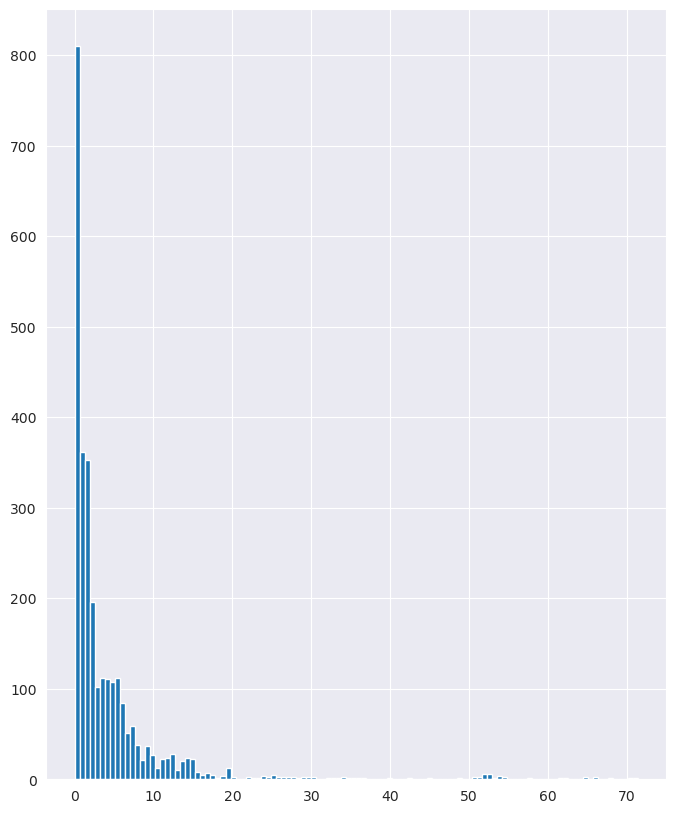

In [147]:
energy["SElectricity from fossil fuels (TWh)"]=energy["Electricity from fossil fuels (TWh)"].map(lambda x: sqrt(x))
energy["SElectricity from fossil fuels (TWh)"].hist(bins='auto')

<Axes: >

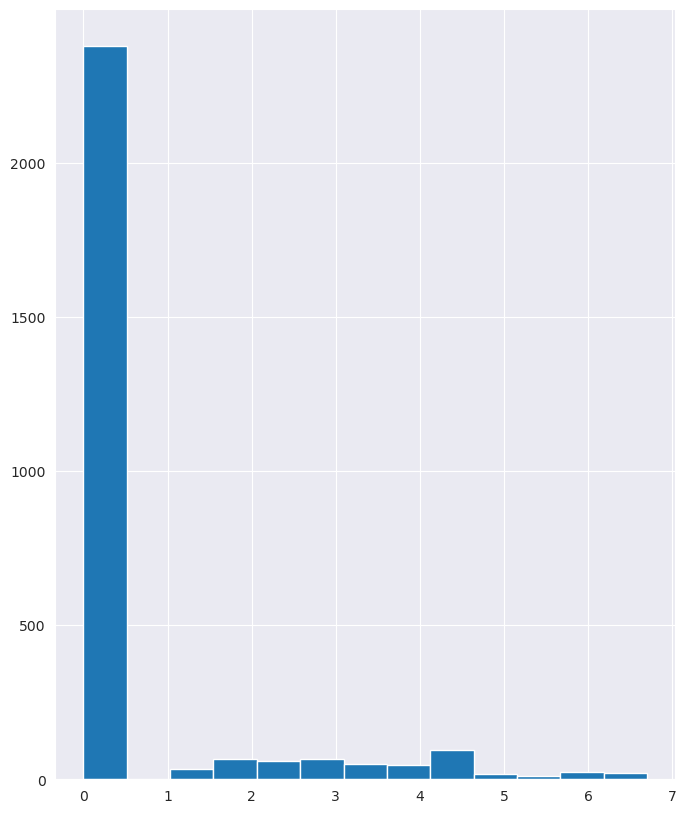

In [148]:
energy["SElectricity from nuclear (TWh)"]=energy["Electricity from nuclear (TWh)"].map(lambda x: log(1+x))
energy["SElectricity from nuclear (TWh)"].hist(bins='auto')

<Axes: >

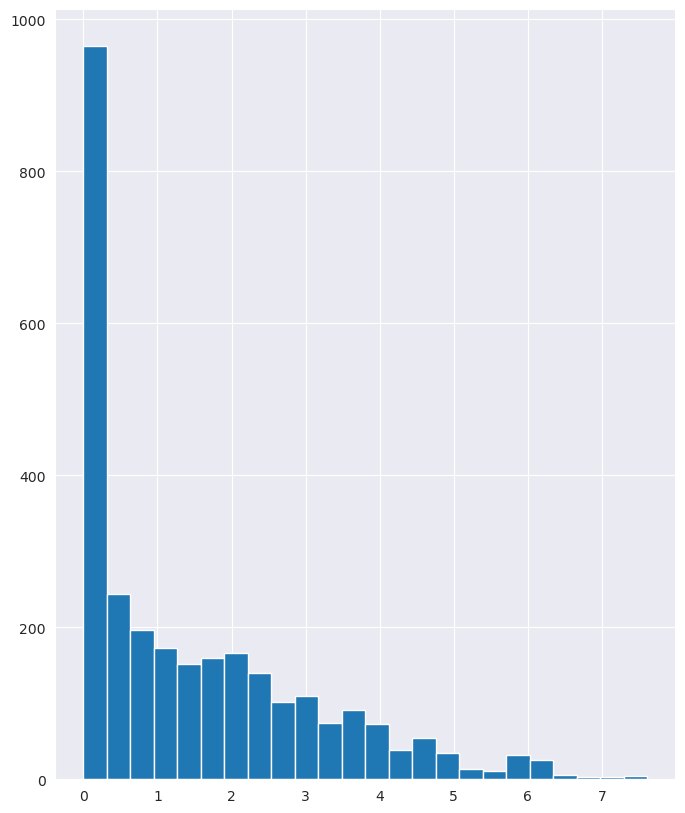

In [149]:
energy["SElectricity from renewables (TWh)"]=energy["Electricity from renewables (TWh)"].map(lambda x: log(1+x))
energy["SElectricity from renewables (TWh)"].hist(bins='auto')

<Axes: >

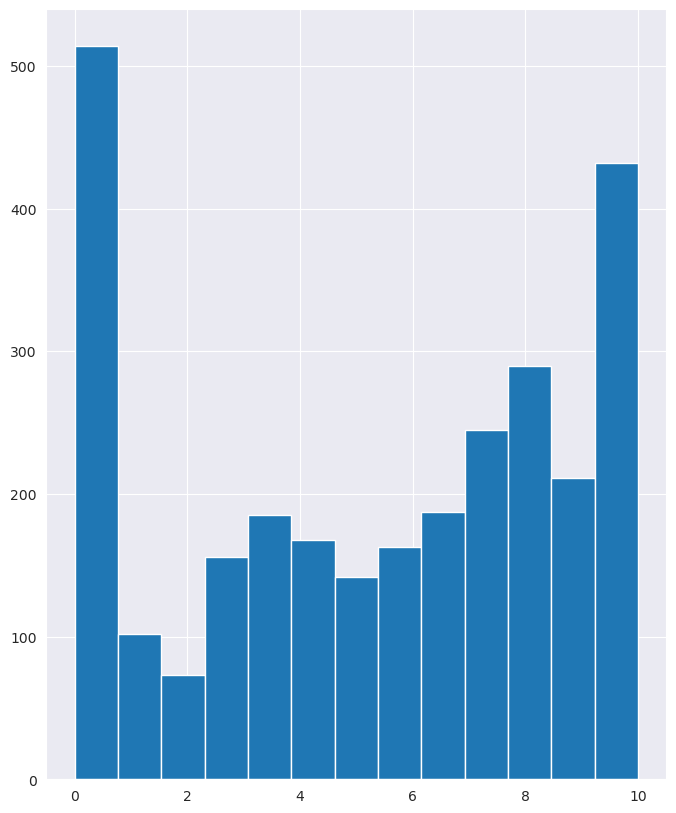

In [150]:
energy["SLow-carbon electricity (% electricity)"]=energy["Low-carbon electricity (% electricity)"].map(lambda x: sqrt(x))
energy["SLow-carbon electricity (% electricity)"].hist(bins='auto')

<Axes: >

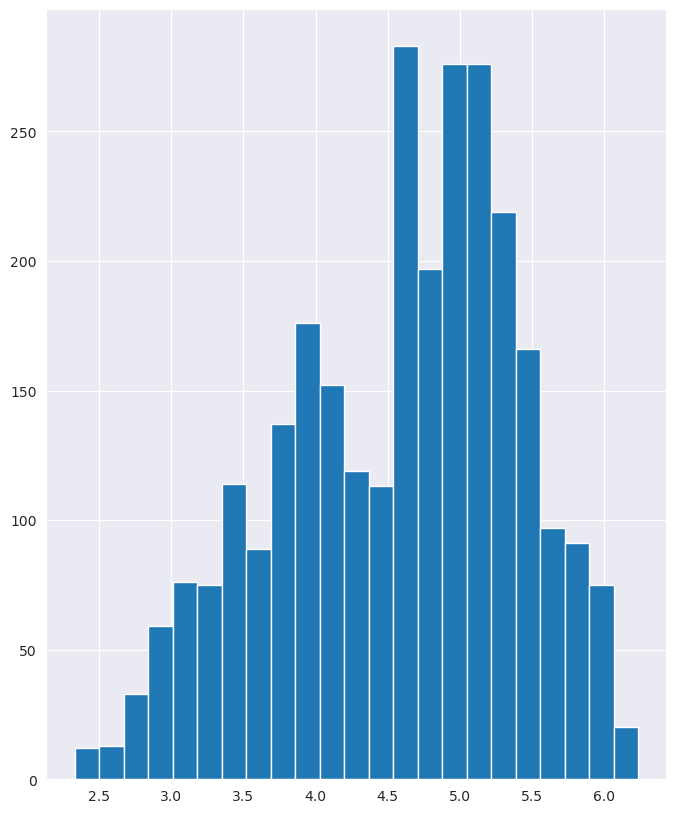

In [151]:
energy["SPrimary energy consumption per capita (kWh/person)"]=energy["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(sqrt(x)))
energy["SPrimary energy consumption per capita (kWh/person)"].hist(bins='auto')

<Axes: >

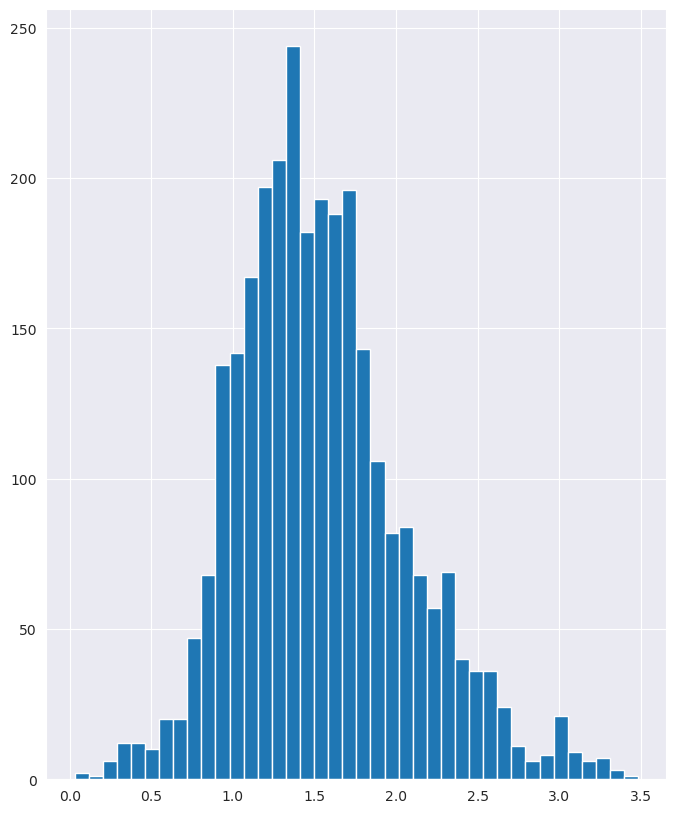

In [152]:
energy["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"]=energy["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"].map(lambda x: log(x))
energy["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"].hist(bins='auto')

<Axes: >

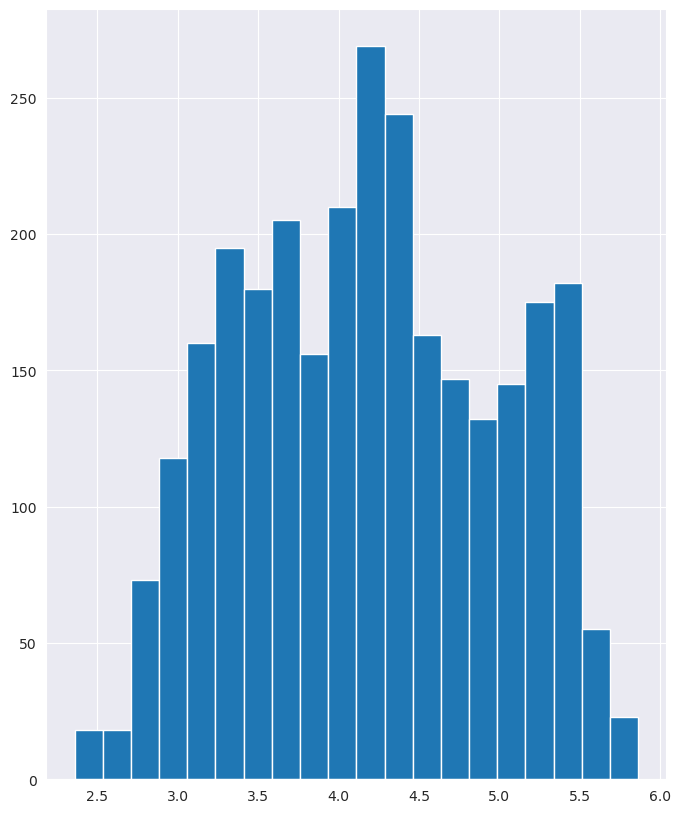

In [153]:
energy["Sgdp_per_capita"]=energy["gdp_per_capita"].map(lambda x:log(sqrt(x)))
energy["Sgdp_per_capita"].hist(bins='auto')

<Axes: >

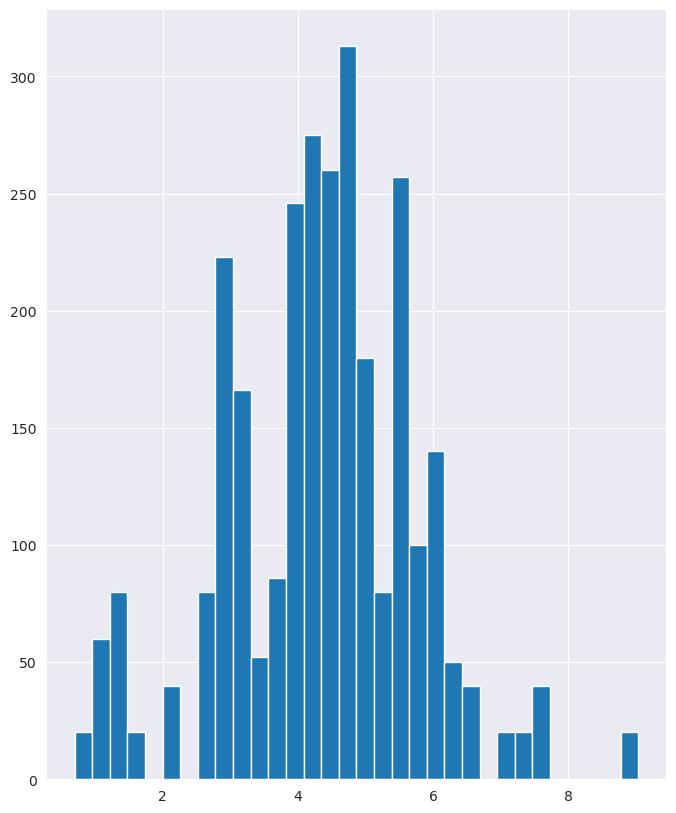

In [154]:
energy["SDensity\\n(P/Km2)"]=energy["Density\\n(P/Km2)"].map(lambda x:log(x))
energy["SDensity\\n(P/Km2)"].hist(bins='auto')

<Axes: >

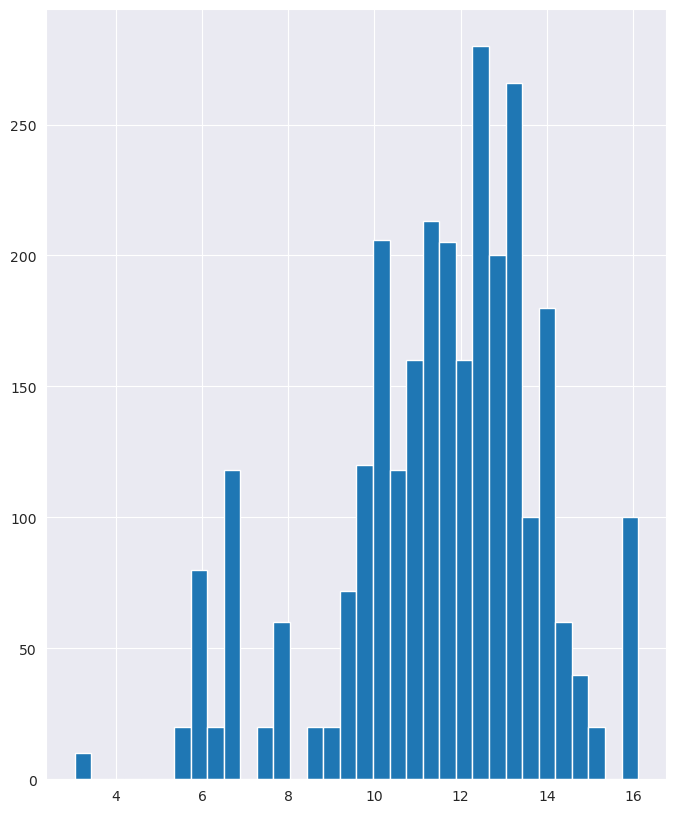

In [155]:
energy["SLand Area(Km2)"]=energy["Land Area(Km2)"].map(lambda x:log(x))
energy["SLand Area(Km2)"].hist(bins='auto')

<Axes: >

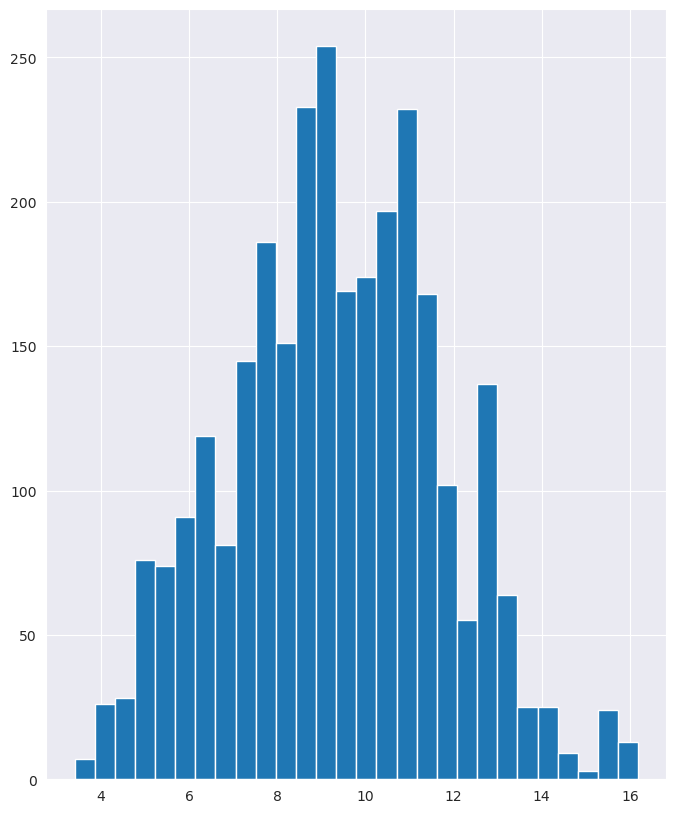

In [156]:
energy["SValue_co2_emissions_kt_by_country"]=energy["Value_co2_emissions_kt_by_country"].map(lambda x:log(x))
energy["SValue_co2_emissions_kt_by_country"].hist(bins='auto')

In [157]:


del energy['Renewable energy share in the total final energy consumption (%)']
del energy['Electricity from fossil fuels (TWh)']
del energy['Electricity from nuclear (TWh)']
del energy['Electricity from renewables (TWh)']
del energy['Low-carbon electricity (% electricity)']
del energy['Primary energy consumption per capita (kWh/person)']
del energy['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']
del energy['gdp_per_capita']
del energy['Density\\n(P/Km2)']
del energy['Land Area(Km2)']
#del energy['Value_co2_emissions_kt_by_country']
del energy['Access to clean fuels for cooking']
del energy['Access to electricity (% of population)']


Afin de mieux visualiser l'hétérogénéité de la variable Value_co2_emissions_kt_by_country, nous n'allons pas la supprimer à cette étape.

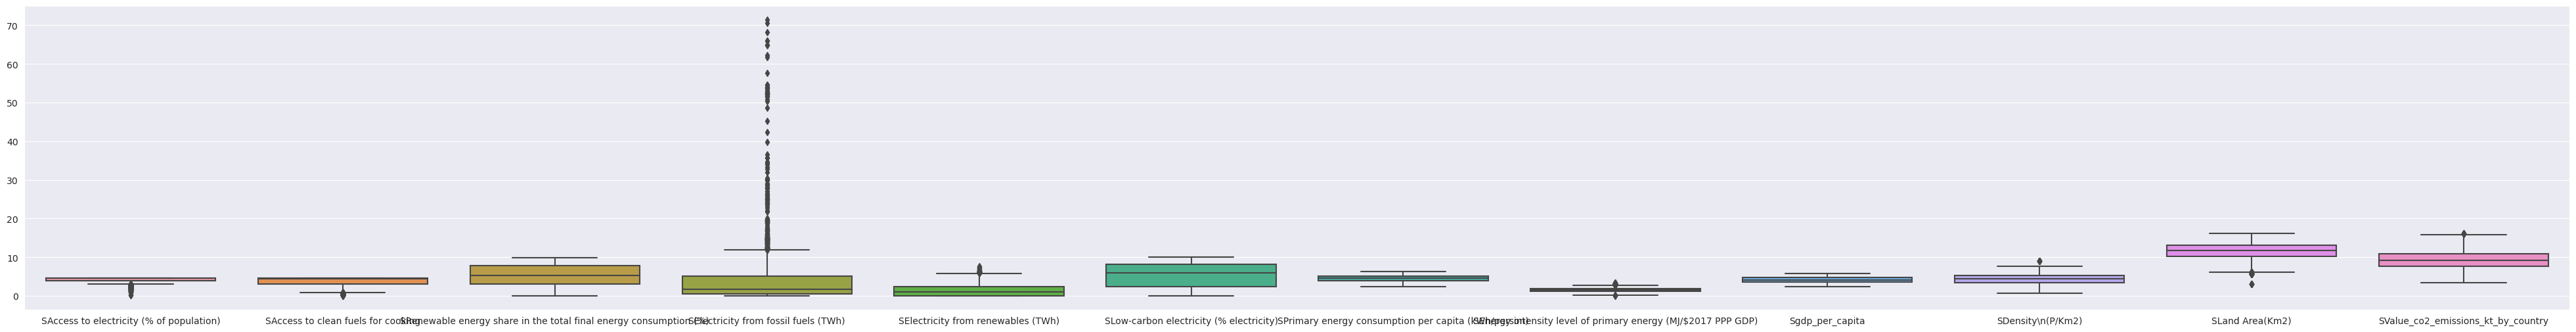

In [164]:
plt.figure(figsize=(50,6))
energy2=energy.drop(energy.columns[3],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[4],axis=1)
sns.boxplot(data=energy2)

plt.show()

Les transformations réalisées ont permis de rendre toutes les variables ci dessus symétriques sauf Access to electricity (% of population) et Access to clean fuels for cooking.

<Axes: >

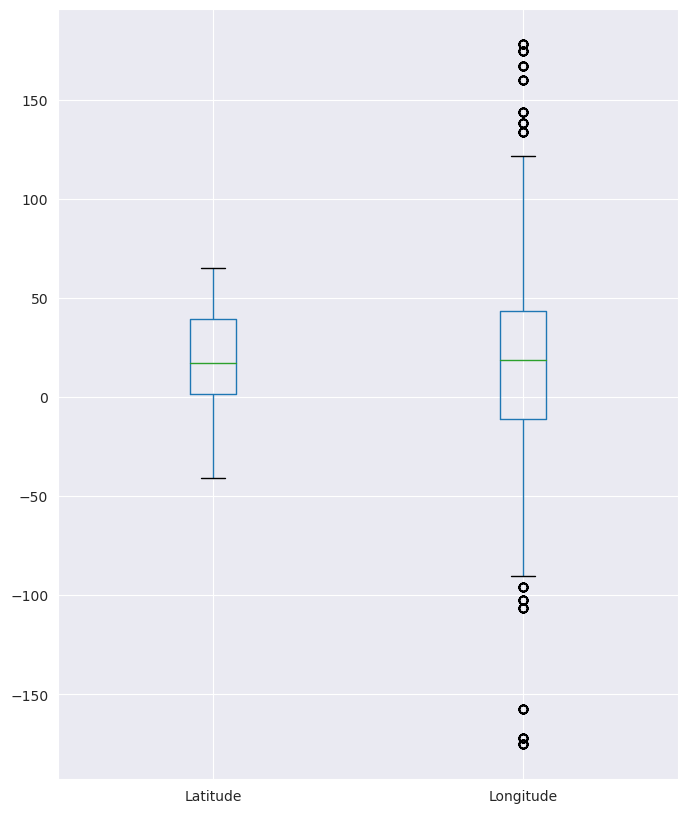

In [163]:
energy.describe()
energy3=energy[['Latitude','Longitude']]
energy3.boxplot()

On contsate que les variables Latitude et Longitude sont symétriques sans passer par une transformation. Le boxplot de Longitude comporte des outliers, des valeurs de longitude isolées ont donc été prises.

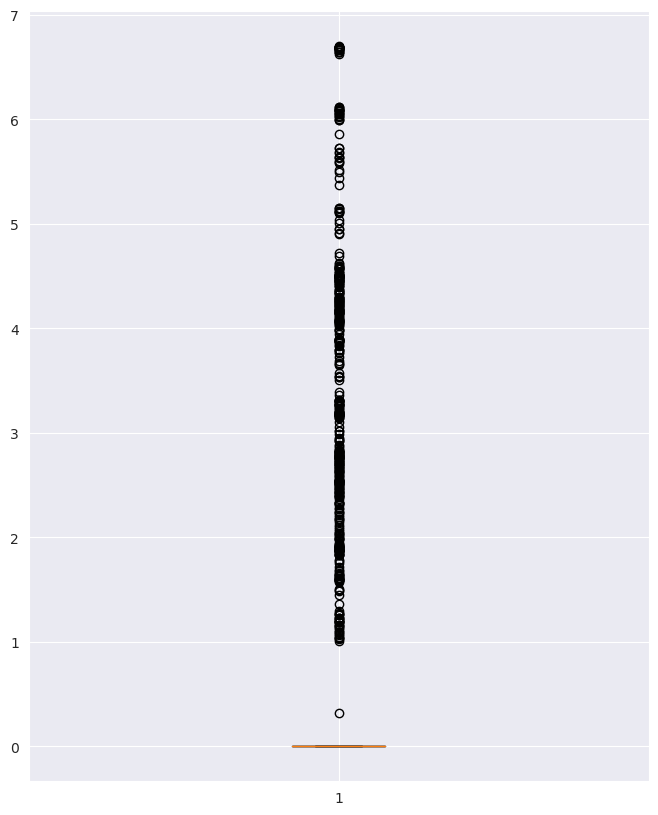

In [123]:
plt.boxplot(energy['SElectricity from nuclear (TWh)'])
plt.show()

Le boxplot de Electricity from nuclear (TWh) comporte beaucoup d'outliers. Cela peut être expliqué par le fait que tous les pays n'ont pas le même accès au nucléaire.

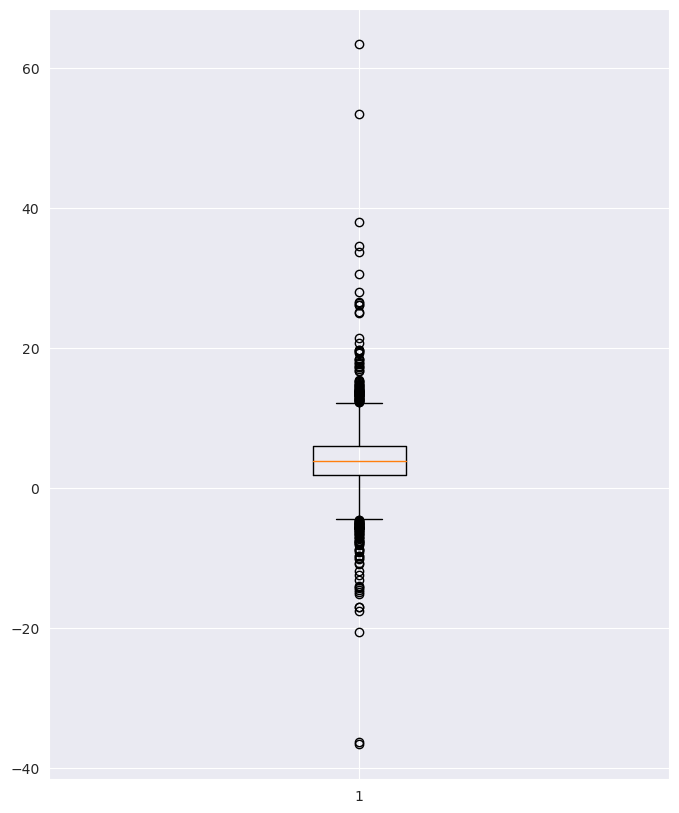

In [161]:
plt.boxplot(energy['gdp_growth'])
plt.show()

Le boxplot du taux de croissance annuel du PIB montre que les données sont sur une grande étendue. De plus, on remarque la présence d'outliers suggérant une grande variabilité dans les performances économiques entre les nations. Ces valeurs abbérantes pourraient indiquer des facteurs économiques affectant certains pays de manière significative.

# Q5 

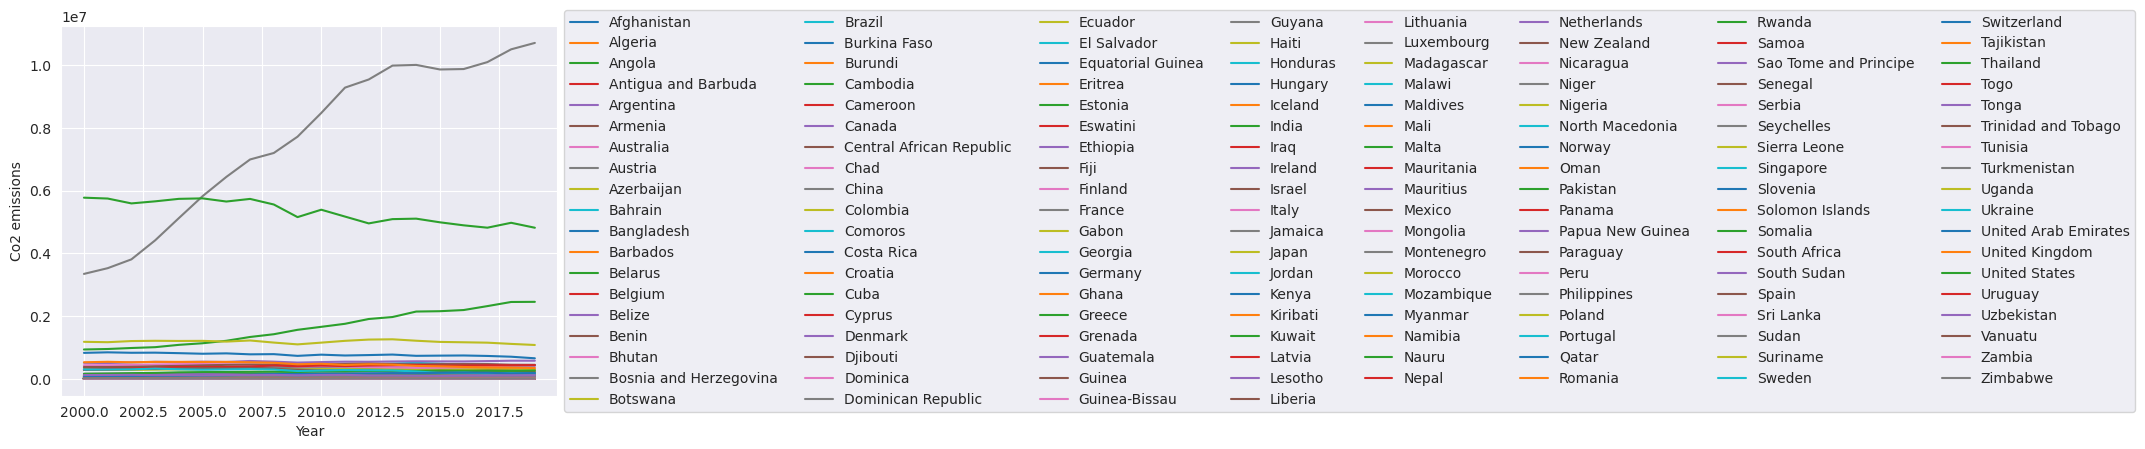

In [78]:
pays = energy['Entity'].unique()

# Plotting using Matplotlib
for i, p in enumerate(pays):
    country_data = energy[energy['Entity'] == p]
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=p)

plt.xlabel('Year')
plt.ylabel('Co2 emissions')
plt.legend(loc='center left', ncol=8, bbox_to_anchor=(1, 0.5), borderaxespad=0.5)
plt.show()

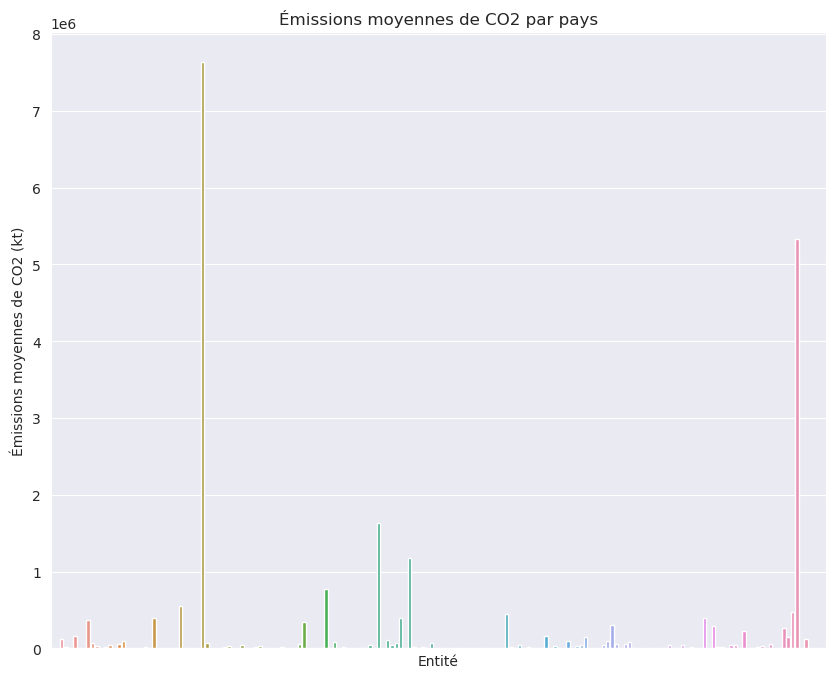

In [188]:
Moy = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().reset_index()
Moy_classe = Moy.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)



plt.figure(figsize=(10, 8))
sns.barplot(x='Entity', y='Value_co2_emissions_kt_by_country', data=Moy_classe)
plt.xlabel('Entité')
plt.ylabel('Émissions moyennes de CO2 (kt)')
#plt.xticks(rotation=90)
plt.xticks([]) # Enlève les légendes de l'axe des x
plt.title('Émissions moyennes de CO2 par pays')
plt.show()


On remarque sur ces graphiques que la plupart des pays ont une émission CO2 très basse mais quelques uns ont une émission presque 6 fois supérieure. Nous allons donc déterminer les pays les plus émetteurs de CO2.

In [79]:
# Calculating standard deviation
sd = energy['Value_co2_emissions_kt_by_country'].std()
m=energy['Value_co2_emissions_kt_by_country'].mean()
minCO2=energy['Value_co2_emissions_kt_by_country'].min()
maxCO2=energy['Value_co2_emissions_kt_by_country'].max()
print("Standard deviation:", sd)
print("Mean:", m)
print("Min:", minCO2)
print("Max:", maxCO2)


Standard deviation: 818020.2459125534
Mean: 168818.21810476022
Min: 30.0
Max: 10707219.73


L'écart-type étant très grand, cela confirme la grande disparité d'émission de CO2 entre les individus.

In [187]:
print(Moy_classe.head(5))

            Entity  Value_co2_emissions_kt_by_country
34           China                       7.636642e+06
169  United States                       5.329539e+06
74           India                       1.633979e+06
81           Japan                       1.183734e+06
62         Germany                       7.736445e+05


Les 5 pays les plus émetteurs de CO2 entre 2000 et 2019 sont la Chine, les États-Unis d'Amérique, l'Inde, le Japon et l'Allemagne. On remarque que les pays sur le podium ont une grande population, cela peut expliquer cette grande émission.

# 6

# Entre variables quantitatives

In [81]:
#del energy['Value_co2_emissions_kt_by_country']

In [82]:
from pandas.plotting import scatter_matrix

In [83]:
!pip install pyensae

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.1/493.1 kB 5.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyquicksetup: filename=pyquicksetup-0.2.4-py3-none-any.whl size=6711 sha256=03b1be141fb24608e48eb46c067bb29c3253b960558fc21f77be9a3130cb240b
  Stored in directory: /home/jsouffle/.cache/pip/wheels/95/77/67/83fd7a61f48265da1f864d211aac3e4887f6ebd702426e5049
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117032 sha256=d4b85f862ab137cf5ed0f75af9c5ae6720f765d876e4a0cd4622298dea948e0f
  Stored in directory: /home/jsouffle/.cache/pip/wheels/6a/f3/0c/fa347dfa663f573462c6533d259c2c859e97e103d1ce21538f
Successfully built 

/home/jsouffle/.local/lib/python3.11/site-packages/pyensae/graphhelper/corrplot.py:77: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  if self.df.max().max() > 1 or self.df.min().min() < -1:
/home/jsouffle/.local/lib/python3.11/site-packages/pyensae/graphhelper/corrplot.py:85: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = self.df.corr()
/home/jsouffle/.local/lib/python3.11/site-packages/pyensae/graphhelper/linkage.py:43: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = linkage(D, method=meth

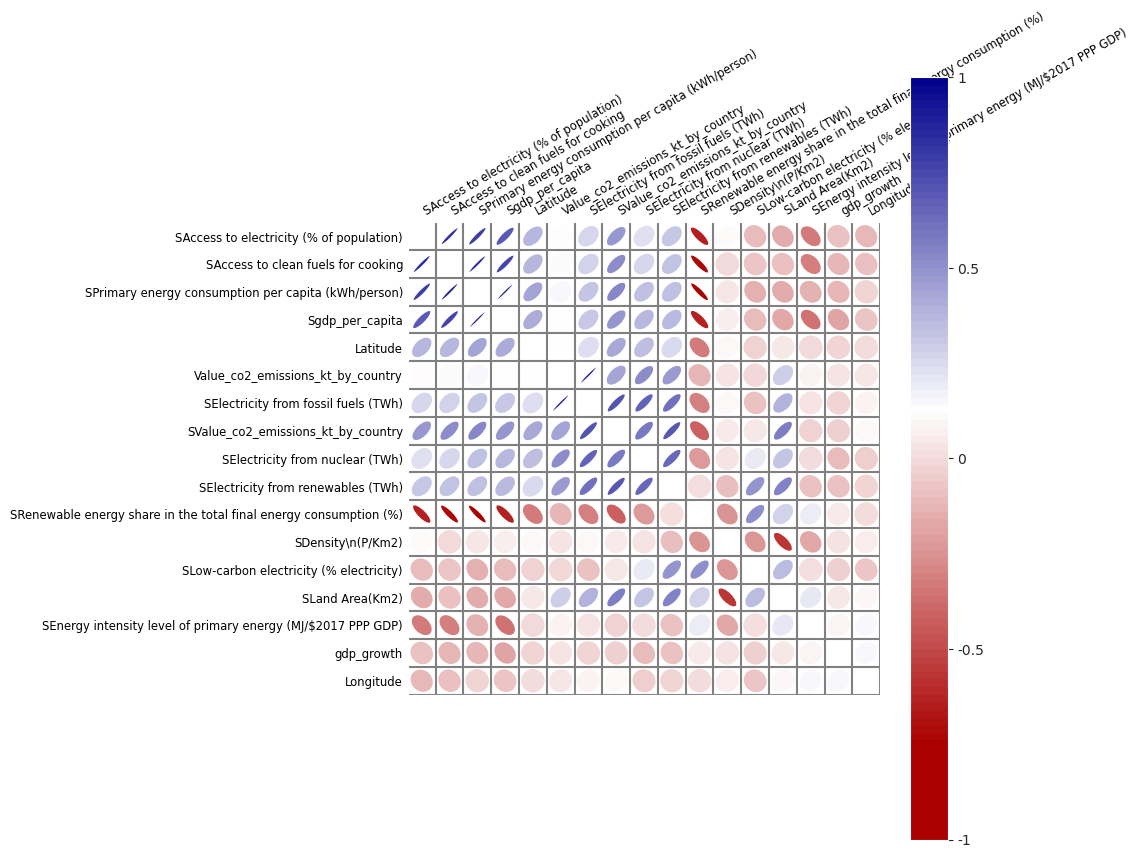

In [181]:
from pyensae.graphhelper import Corrplot

c = Corrplot(energy)
c.plot(figsize=(12,12))
#plt.legend(loc='center left', ncol=8, bbox_to_anchor=(1, 0.5))
plt.show()

In [85]:
#energy.corr()

Sur ce corrplot on distingue quatre principaux groupes de variables linéairement corrélées. L'accès à l'électricité et aux carburants propres, la consommation d'énergie par personnes et le PIB/personnes sont liées positivement. 
Ceci semble indiquer que les pays riches ont plus accès à l'électricité et aux carburants propres, ce qui leur permet de consommer plus d'énergie.
 
L'émission de CO2 par pays, la quantité d'électricité renouvelable, fossile et nucéaire, sont également corrélées positivement. Cela peut être dû au fait que la production d'énergie pollue.

Le pourcentage d'énergie renouvelable total est lié négativement à l'accès à l'électricité et aux carburants propres, la consommation d'énergie par personnes et le PIB/personnes. Ceci peut être expliqué par le fait que si un pays riche a accès à beaucoup d'énergies et consomme en conséquence, les sources sont diversifiées, la part de renouvelable est donc diluée.


Enfin, on remarque que la densité et la superficie sont corrélées négativement. La densité étant calculée comme la population sur la superficie, il est logique que plus la superficie est grande (à population fixe), plus la densité diminue.

On note que la variable à prédire est liée positivement avec la quantité d'électricité renouvelable, fossile et nucéaire ainsi que la superficie, et liée négativement avec le pourcentage d'énergie renouvelable. 

# Variables qualitatives

In [86]:
crosstable=pd.crosstab(energy['Entity'],energy['Year'])
crosstable

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Angola,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Argentina,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Uzbekistan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Vanuatu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


On note que par année, les relevés se font 1 ou 0 fois par pays.

In [205]:
del energy['Value_co2_emissions_kt_by_country']

# ACP

Avant de faire une analyse en composantes principales (ACP), nous allons centrer et réduire nos données puisque les variables n'ont pas les mêmes unités. Comme le montre les boxplots de IV, les données ne sont également pas à la même échelle. L'ACP ne se faisant que sur les variables quantitatives, nous allons également enlever les variables Entity et Year.

In [206]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
energy2=energy.drop(energy.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy_scale=scale(energy2)

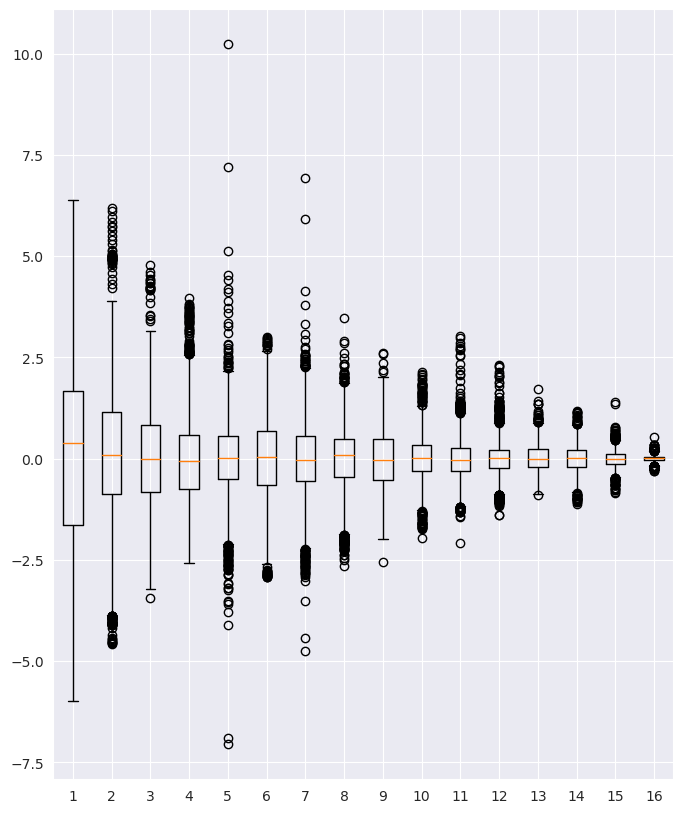

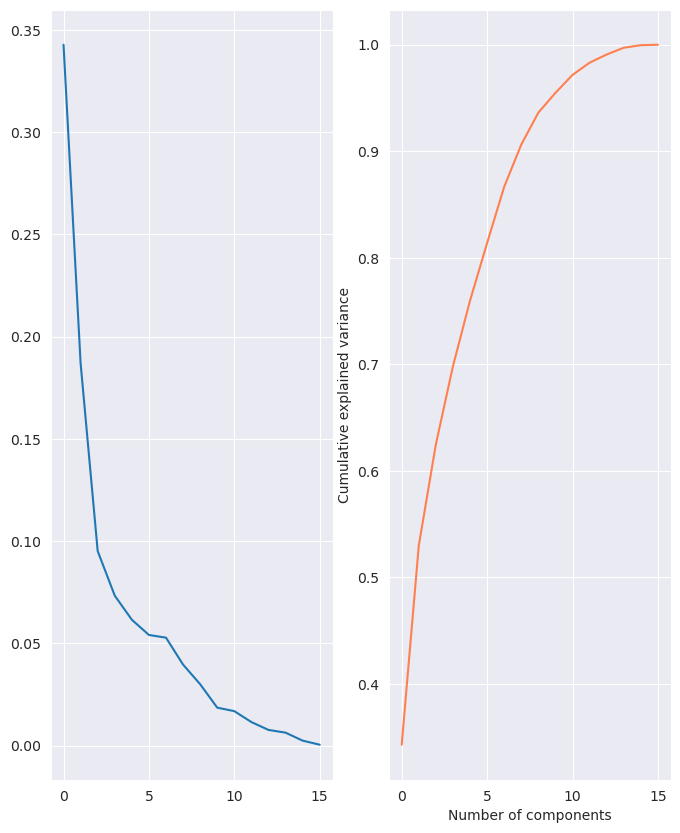

In [207]:
pca = PCA()

C = pca.fit(energy_scale).transform(energy_scale)
plt.boxplot(C)
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2)
#plt.subplot(1,2,2)
ax1.plot(pca.explained_variance_ratio_)
#plt.show()
#plt.subplot(2,2,2)
ax2.plot(np.cumsum(pca.explained_variance_ratio_), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');


Afin d'expliquer environ 80% de la variance de notre jeu de données, nous choisissons de garder 6 dimensions. Ces 6 dimensions permettent de capturer les principales structures de variations de données tout en réduisant le nombre de variables.  

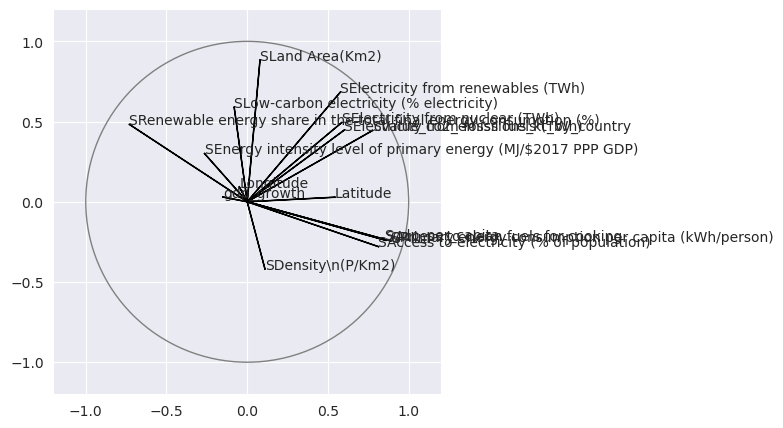

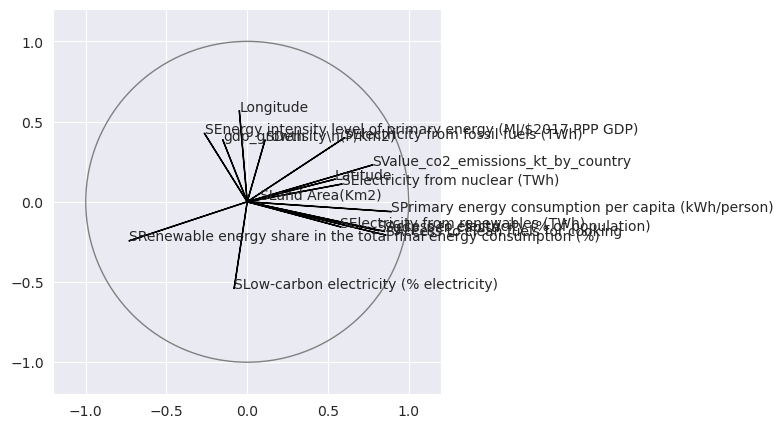

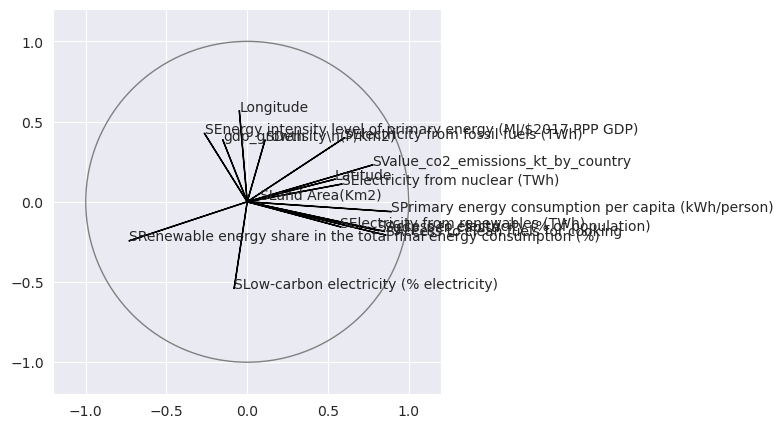

In [212]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, energy2.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()



coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord3, energy2.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()



coord4=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord4, energy2.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Au vu du grand nombre de variables que nous avons, le graphe des variables est illisible. Cependant, nous pouvons déjà remarquer que toutes nos variables sont bien représentées dans au moins un plan d'ACP. Les 6 dimensions choisies sont donc un bon espace de projection de nos données. Afin d'interpréter chacune des dimensions, nous allons calculer leur corrélation avec nos variables.

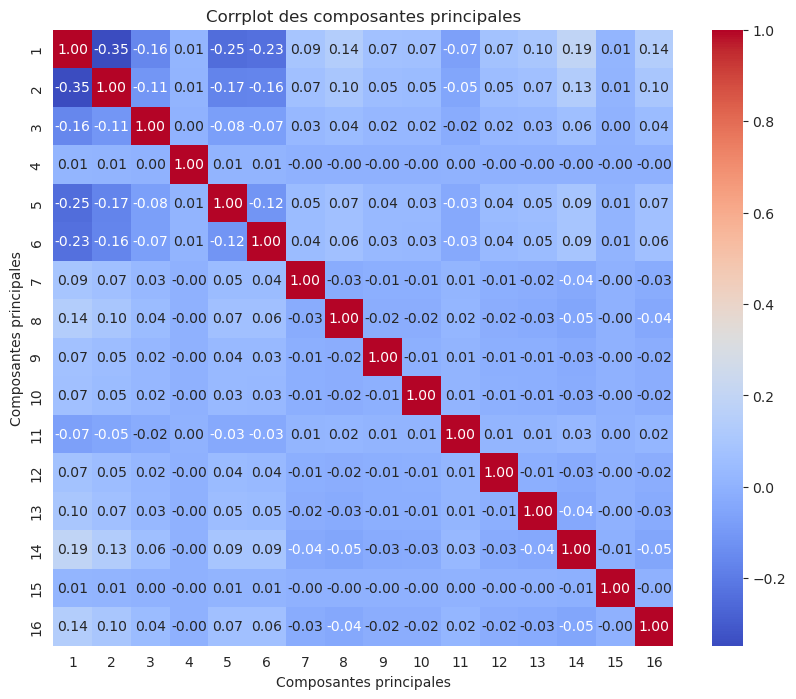

In [209]:
corr_matrix = np.corrcoef(pca.components_)

# Créer un DataFrame pour stocker la matrice de corrélation
corr_df = pd.DataFrame(corr_matrix, columns=range(1, len(pca.components_)+1), index=range(1, len(pca.components_)+1))

# Tracez le corrplot en utilisant seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrplot des composantes principales')
plt.xlabel('Composantes principales')
plt.ylabel('Composantes principales')
plt.show()

 


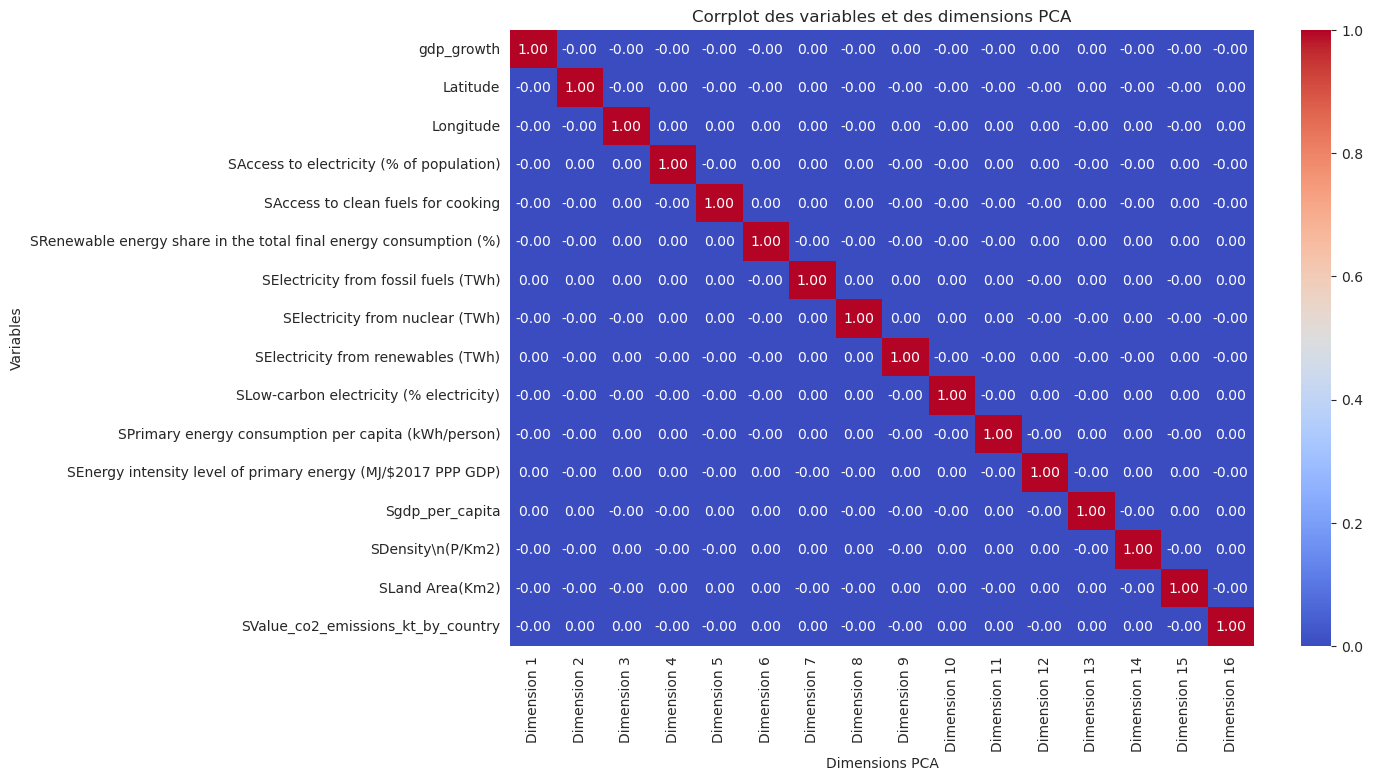

In [213]:
# Supposons que vous avez déjà effectué votre PCA et que les résultats sont stockés dans 'pca' 
# Supposons également que vous avez vos données d'origine 'energy_scale' 
# Calculer la matrice de corrélation entre les variables originales et les composantes principales 
corr_matrix = np.corrcoef(energy_scale.T)
corr_matrix_pca = np.corrcoef(pca.transform(energy_scale).T) 
# Créer un DataFrame pour stocker la matrice de corrélation
corr_df = pd.DataFrame(corr_matrix_pca, columns=['Dimension {}'.format(i+1) for i in range(pca.n_components_)]) 
# Supposons que les noms de colonnes sont stockés dans une liste appelée 'column_names' 
column_names = energy2.columns 
# Remplacez ceci par les vrais noms de vos colonnes 
# Définir les noms de colonnes du DataFrame comme les variables originales 
corr_df.index = column_names 
# Tracez le corrplot en utilisant seaborn 
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Corrplot des variables et des dimensions PCA')
plt.xlabel('Dimensions PCA')
plt.ylabel('Variables') 
plt.show()

 

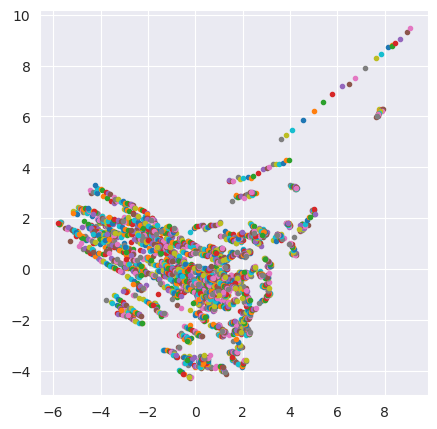

In [93]:
plt.figure(figsize=(5,5))
for i, j in zip(C[:,0], C[:,1]):
    
    plt.plot(i, j, ".")
#plt.axis((-4,6,-4,6))  
plt.show()

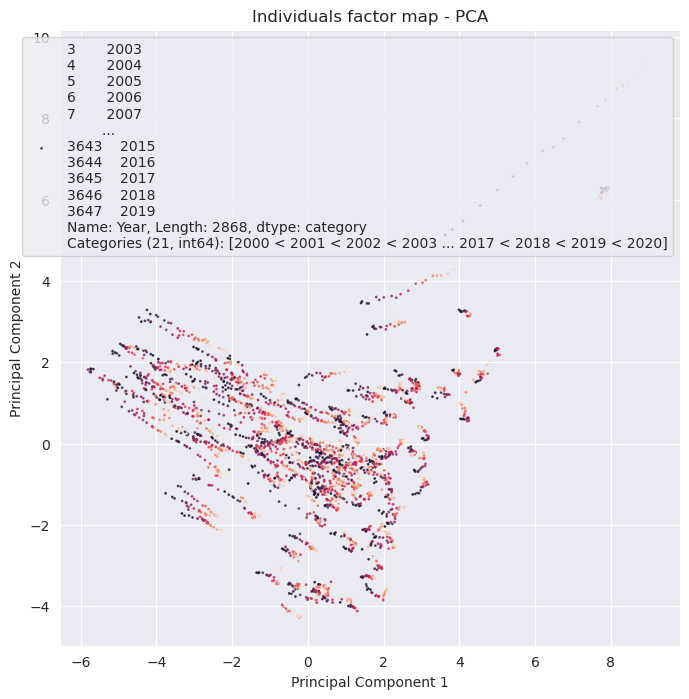

In [94]:

color=energy['Year']    
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0], C[:, 1], s=1, linewidths=1, alpha=0.7,c=color, label=color)

plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# co2 et Year

    Year  Value_co2_emissions_kt_by_country
0   2000                      138016.423358
1   2001                      139578.188406
2   2002                      139321.070047
3   2003                      144971.775235
4   2004                      152039.360934
5   2005                      157939.574784
6   2006                      162745.391503
7   2007                      165933.054883
8   2008                      166458.124618
9   2009                      164887.986119
10  2010                      174019.515479
11  2011                      179209.999215
12  2012                      182964.445299
13  2013                      186437.520497
14  2014                      184016.326504
15  2015                      182412.377554
16  2016                      183602.741223
17  2017                      185800.340931
18  2018                      189814.107772
19  2019                      189609.451853


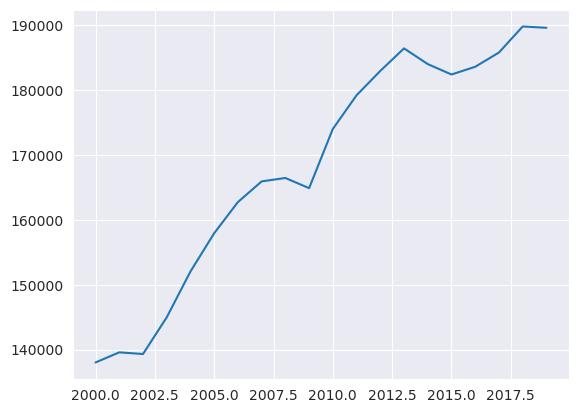

In [95]:
Moy = energy.groupby('Year')['Value_co2_emissions_kt_by_country'].mean().reset_index()
#Moy_classe = Moy.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)
plt.plot(np.linspace(2000,2020,21),Moy['Value_co2_emissions_kt_by_country'])
print(Moy.dropna())


In [96]:
energy.groupby("Year")['Value_co2_emissions_kt_by_country'].agg([np.mean, np.std, np.median])



,mean,std,median
Year,,,
2000,138016.423358,586021.730034,9000.000000
2001,139578.188406,589751.490220,9045.000000
2002,139321.070047,588124.368169,8985.000133
2003,144971.775235,619667.977855,9310.000420
2004,152039.360934,661777.718380,9560.000420
2005,157939.574784,702156.484313,10510.000230
2006,162745.391503,733594.069242,9970.000267
2007,165933.054883,766181.283626,10075.000284
2008,166458.124618,770546.372457,9699.999810


In [97]:
del energy['Value_co2_emissions_kt_by_country']

In [98]:
del energy['SElectricity from fossil fuels (TWh)']

## Extraction des échatillons d'apprentissage et test

In [99]:
energy.describe()

,gdp_growth,Latitude,Longitude,SAccess to electricity (% of population),SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2),SValue_co2_emissions_kt_by_country
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,3.895326,18.140402,12.970486,4.160131,3.632823,5.261295,0.580774,1.504984,5.286579,4.576974,1.540333,4.178373,4.349602,11.521173,9.329532
std,4.645613,24.924975,65.478645,0.743819,1.349535,2.850207,1.411873,1.596120,3.418414,0.822569,0.517348,0.791067,1.406022,2.368012,2.384950
min,-36.658153,-40.900557,-175.198242,0.224957,0.000000,0.000000,0.000000,0.000000,0.000000,2.327504,0.029559,2.358924,0.693147,3.044522,3.401197
25%,1.770575,1.650801,-10.940835,3.974769,3.138748,3.031089,0.000000,0.086178,2.468009,3.965097,1.187843,3.549106,3.433987,10.300349,7.690513
50%,3.788166,17.060816,18.643501,4.574711,4.413404,5.365631,0.000000,0.985817,5.916901,4.693102,1.481605,4.167609,4.418841,11.790231,9.251961
75%,5.957490,39.399872,43.679291,4.605170,4.615121,7.788934,0.000000,2.407170,8.177977,5.184217,1.814825,4.802148,5.327876,13.098276,10.970695
max,63.379875,64.963051,178.065032,4.605170,4.615121,9.800000,6.697540,7.608657,10.000000,6.239166,3.483392,5.862056,9.030974,16.116561,16.186429


In [100]:
energyQuant=energy.drop(energy.columns[0],axis=1)
energyQuant=energyQuant.drop(energyQuant.columns[0],axis=1)                                       

In [101]:
energyQuant=energyQuant.drop(energyQuant.columns[14],axis=1)
energyQuant.describe()

,gdp_growth,Latitude,Longitude,SAccess to electricity (% of population),SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2)
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,3.895326,18.140402,12.970486,4.160131,3.632823,5.261295,0.580774,1.504984,5.286579,4.576974,1.540333,4.178373,4.349602,11.521173
std,4.645613,24.924975,65.478645,0.743819,1.349535,2.850207,1.411873,1.596120,3.418414,0.822569,0.517348,0.791067,1.406022,2.368012
min,-36.658153,-40.900557,-175.198242,0.224957,0.000000,0.000000,0.000000,0.000000,0.000000,2.327504,0.029559,2.358924,0.693147,3.044522
25%,1.770575,1.650801,-10.940835,3.974769,3.138748,3.031089,0.000000,0.086178,2.468009,3.965097,1.187843,3.549106,3.433987,10.300349
50%,3.788166,17.060816,18.643501,4.574711,4.413404,5.365631,0.000000,0.985817,5.916901,4.693102,1.481605,4.167609,4.418841,11.790231
75%,5.957490,39.399872,43.679291,4.605170,4.615121,7.788934,0.000000,2.407170,8.177977,5.184217,1.814825,4.802148,5.327876,13.098276
max,63.379875,64.963051,178.065032,4.605170,4.615121,9.800000,6.697540,7.608657,10.000000,6.239166,3.483392,5.862056,9.030974,16.116561


In [102]:
energyDum=pd.get_dummies(energy[["Entity","Year"]])


dfC=pd.concat([energyDum, energyQuant],axis=1)
dfC.head()

,Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Angola,Entity_Antigua and Barbuda,Entity_Argentina,Entity_Armenia,Entity_Aruba,Entity_Australia,Entity_Austria,...,SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2)
3,1,0,0,0,0,0,0,0,0,0,...,2.351375,6.054750,0.0,0.488580,8.186653,2.718971,0.336472,2.625308,4.094345,13.388153
4,1,0,0,0,0,0,0,0,0,0,...,2.476538,6.651316,0.0,0.444686,7.932298,2.659626,0.182322,2.676834,4.094345,13.388153
5,1,0,0,0,0,0,0,0,0,0,...,2.580217,5.820653,0.0,0.463734,7.964977,2.764852,0.343590,2.744534,4.094345,13.388153
6,1,0,0,0,0,0,0,0,0,0,...,2.698000,5.647123,0.0,0.494696,8.728716,2.859206,0.405465,2.787470,4.094345,13.388153
7,1,0,0,0,0,0,0,0,0,0,...,2.791165,5.364699,0.0,0.559616,8.885233,2.935044,0.425268,2.942626,4.094345,13.388153


In [103]:
Y=energy["SValue_co2_emissions_kt_by_country"]

In [104]:
from sklearn.model_selection import train_test_split 
t_size= int(0.2*energy.shape[0])
X1_train,X1_test,Y_train,Y_test=train_test_split(dfC,Y,test_size=t_size,random_state=11)
#Standardisation
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X1_train)  
X_train = scaler.transform(X1_train)  
# Meme transformation sur le test
X_test = scaler.transform(X1_test)

# Regression

### Sans sélection de variables

In [105]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
prev=reg.predict(X_train)


In [106]:
from sklearn.metrics import r2_score
print("MSE=",mean_squared_error(Y_train,prev))
print("R2=",r2_score(Y_train,prev))

MSE= 0.018778795743672402
R2= 0.9967499783266952


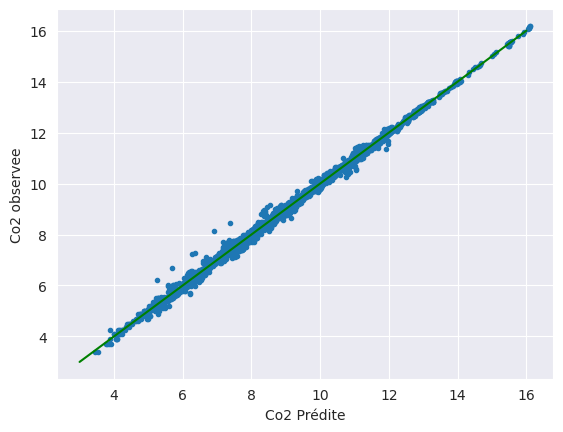

In [107]:
plt.plot(prev,Y_train,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"Co2 Prédite")
plt.ylabel("Co2 observee")
plt.show()

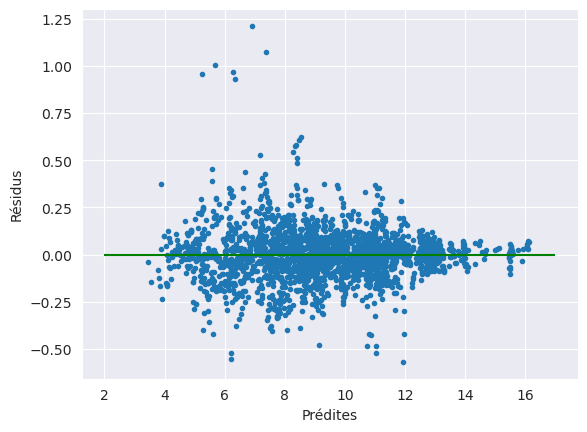

In [108]:
plt.plot(prev,Y_train-prev,".")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,2,17,color='green')
plt.show()

### Avec sélection de variables

In [109]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.978481, Meilleur paramètre = {'alpha': 0.05}


In [110]:
prev=regLassOpt.predict(X_train)
print("MSE=",mean_squared_error(prev,Y_train))
print("R2=",r2_score(Y_train,prev))

MSE= 0.11585296905183944
R2= 0.979949477832621


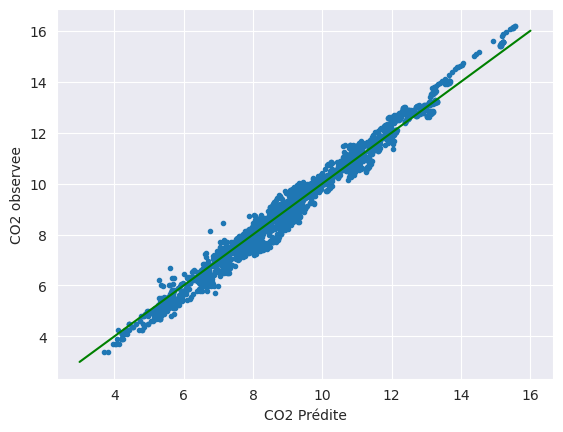

In [111]:
plt.plot(prev,Y_train,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"CO2 Prédite")
plt.ylabel("CO2 observee")
plt.show()

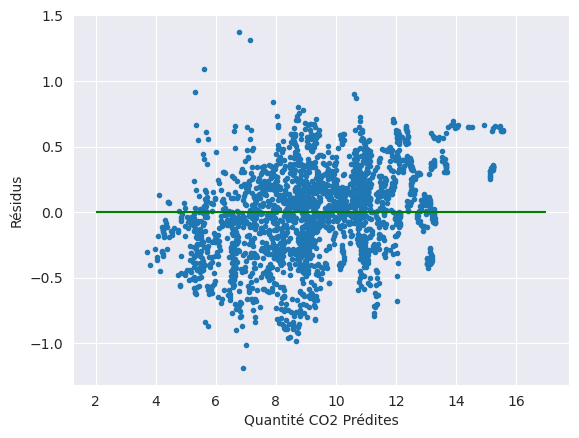

In [112]:
plt.plot(prev,Y_train-prev,".")
plt.xlabel(u"Quantité CO2 Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,2,17,color='green')
plt.show()

In [113]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,Y_train)


In [114]:
coef = pd.Series(model_lasso.coef_, index = X1_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 23 variables et en supprime 188


Text(0.5, 1.0, 'Coefficients du modèle lasso')

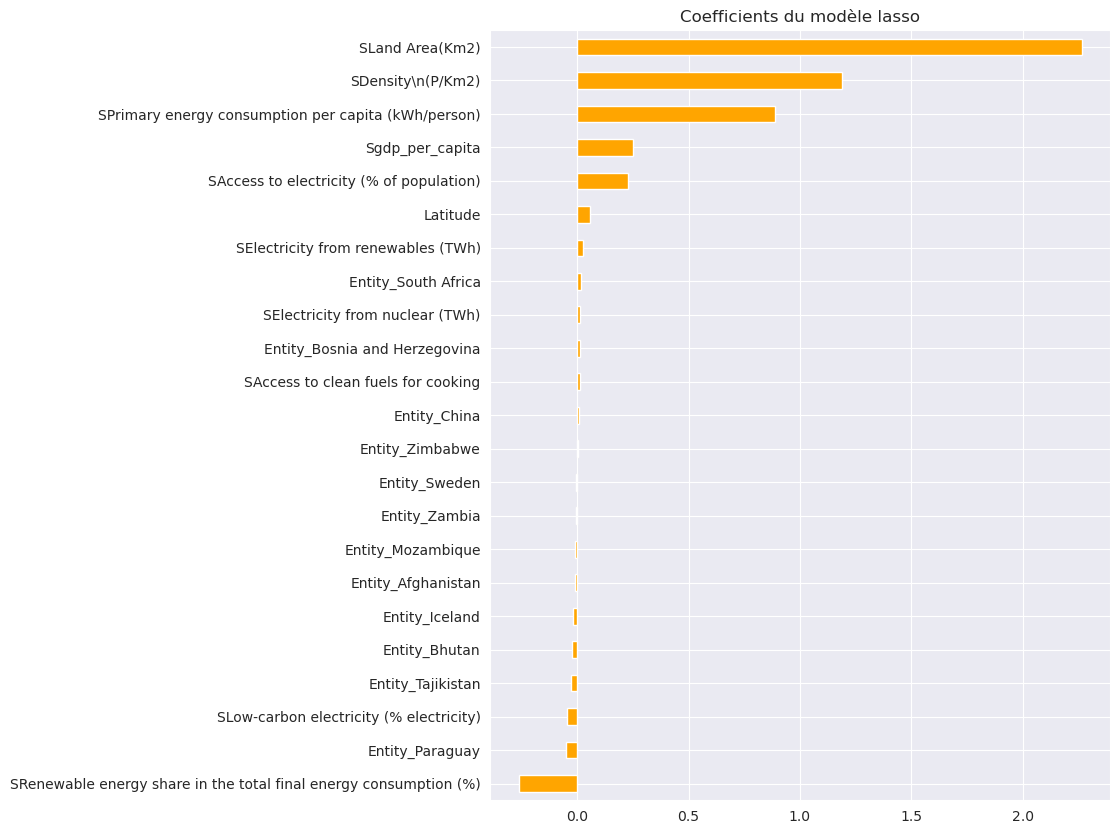

In [115]:
imp_coef = coef.loc[coef!=0]
imp_coef = imp_coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh",color='orange')
plt.title(u"Coefficients du modèle lasso")

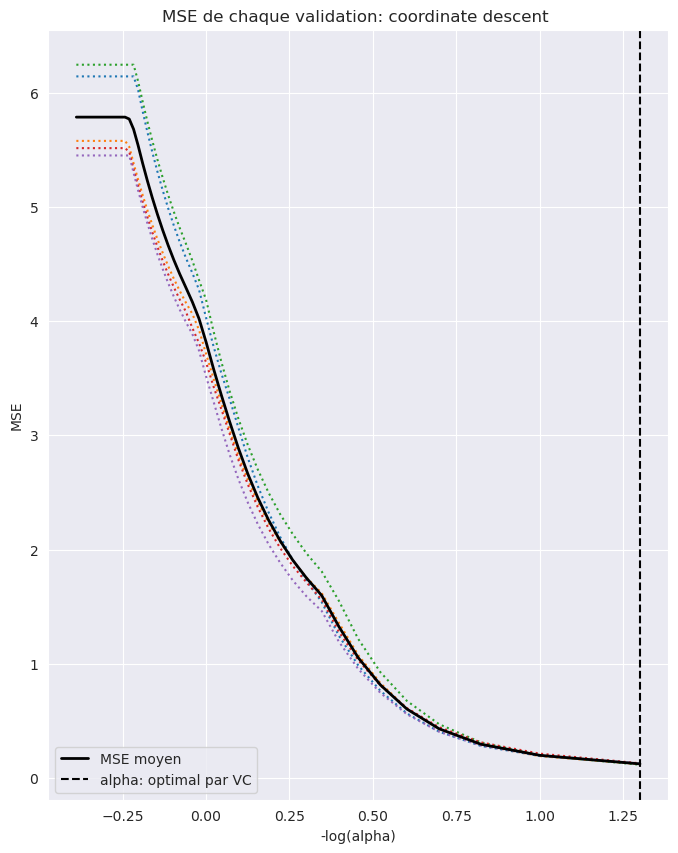

In [116]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()

plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')
#print(model.alpha_)
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

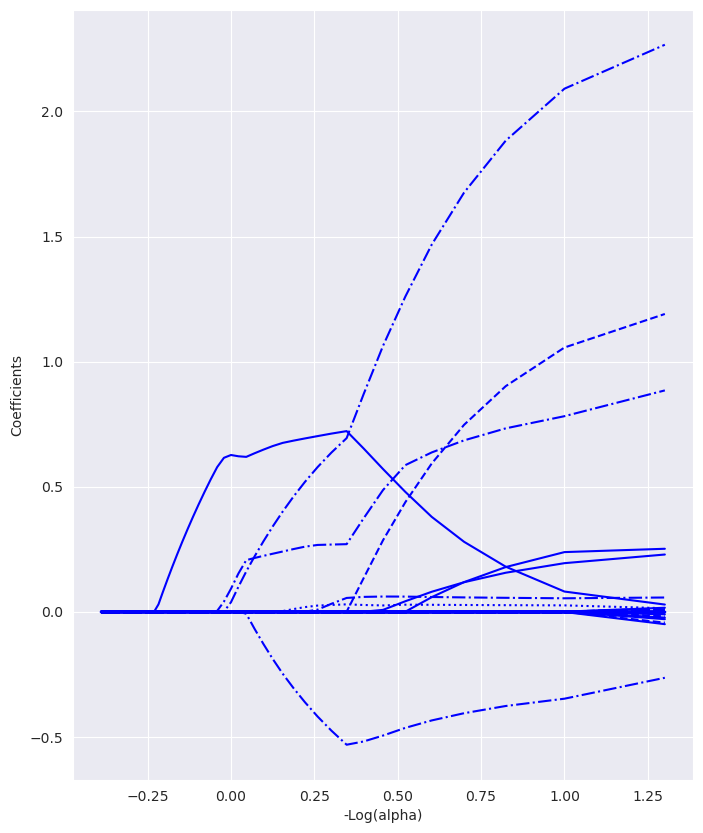

In [117]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train,Y_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

### SVM

In [118]:
from sklearn.svm import SVR
#param=[{"C":[0.4,0.5,0.6,0.8,1,1.4,2]},{"kernel":('rbf')}]
param = {'kernel':('linear','poly', 'rbf', 'sigmoid'), 'C':[0.4,0.5,0.6,0.8,1,1.4,2]}
svm= GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.003958, Meilleur paramètre = {'C': 0.8, 'kernel': 'linear'}


In [119]:
# Prévision de l'échantillon train
prev = svmOpt.predict(X_train)
print("MSE=",mean_squared_error(prev,Y_train))
print("R2=",r2_score(Y_train,prev))

MSE= 0.019769065036938763
R2= 0.9965785937123965


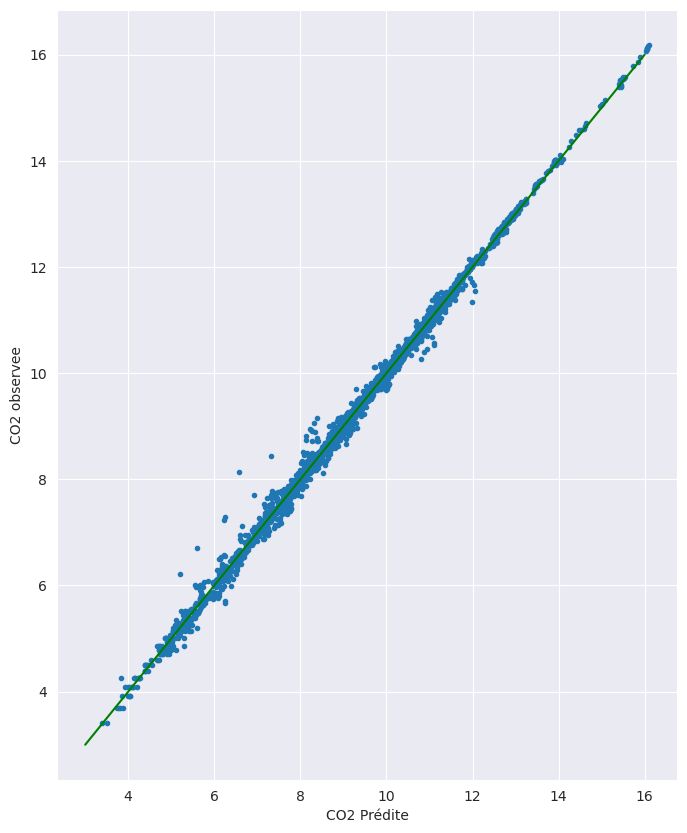

In [120]:
plt.plot(prev,Y_train,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"CO2 Prédite")

plt.ylabel("CO2 observee")
plt.show()


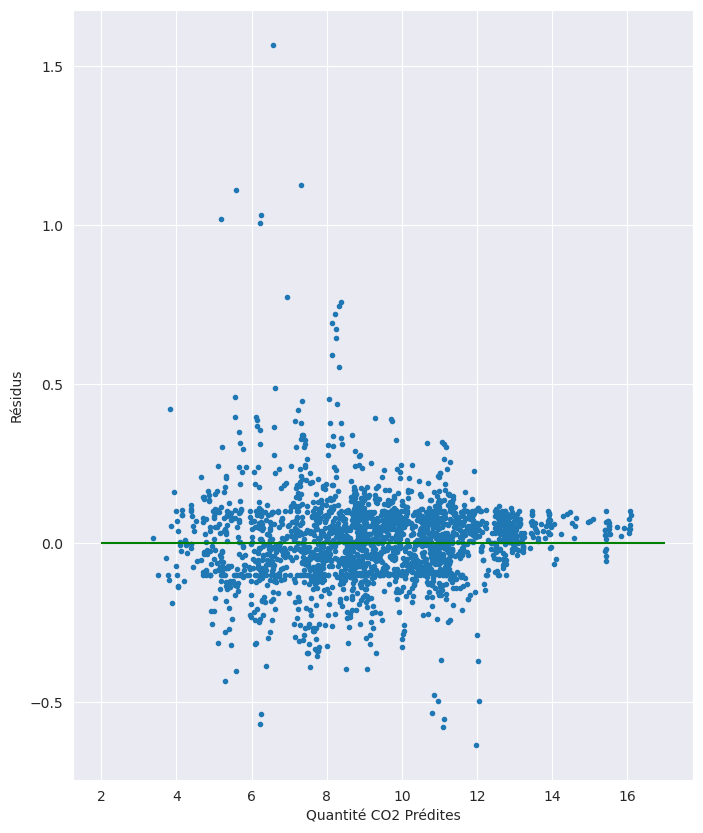

In [179]:
plt.plot(prev,Y_train-prev,".")
plt.xlabel(u"Quantité CO2 Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,2,17,color='green')
plt.show()

### Comparaison des résultats sur l'échantillon de test